#Machine Learning on distant Galactic sources

#####Import Packages

In [ ]:
%%capture
%%bash
pip install imbalanced-learn

In [ ]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC

from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Common imports
import numpy as np
import os
import pandas as pd
import sklearn.metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from pandas.plotting import scatter_matrix 
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import sklearn.metrics
from keras.layers import Dense, Activation, Flatten,Dropout
import keras

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

# to make this notebook's output stable across runs
np.random.seed(40)

#import modin.pandas as pd #a faster version of pandas that runs on multiple cores
import seaborn as sns
import scipy as sp
from astropy.table import Table #to read the .FITS file
from tqdm.notebook import tqdm  
import plotly.express as px
import plotly.graph_objects as go
import timeit
num=0
from google.colab import drive
import os

from sklearn.decomposition import PCA
from sklearn import preprocessing

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
#pd.set_option('use_inf_as_na', True)
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False,'display.max_rows', None) # print all columns in full, prevent line break # print all columns in full, prevent line break

#Machine Learning

All columns:<br>'Herschel_RA',
 'Herschel_Dec',
 'F_BLIND_MF_SPIRE_250',
 'FErr_BLIND_MF_SPIRE_250',
 'F_BLIND_MF_SPIRE_350',
 'FErr_BLIND_MF_SPIRE_350',
 'F_BLIND_MF_SPIRE_500',
 'FErr_BLIND_MF_SPIRE_500',
 'r',
 'P',
 'RA_pix',
 'Dec_pix',
 'F_BLIND_pix_SPIRE_250',
 'FErr_BLIND_pix_SPIRE_250',
 'ID_match',
 'Project_match',
 'Time_match',
 'RA',
 'RA_ERR_match',
 'DEC',
 'DEC_ERR_match',
 'flux_match',
 'flux_err_match',
 'RMS_match',
 'SNR_match',
 'NPIX_match',
 'RES_match',
 'Multi_match',
 'GroupID_1',
 'GroupSize_1',
 'Separation_1',
 's',
 's_norm',
 'Id',
 'alpha',
 'delta',
 'zBEST',
 'type',
 'zPDF',
 'zPDF_l68',
 'zPDF_u68',
 'zMinChi2',
 'chi2_best',
 'zp_2',
 'chi2_2',
 'NbFilt',
 'zq',
 'chiq',
 'modq',
 'mods',
 'chis',
 'maskUVISTA',
 'maskHSC',
 'maskSCAM',
 'mask',
 'model',
 'age',
 'extinction',
 'MFUV',
 'MNUV',
 'MU',
 'MG',
 'MR',
 'MI',
 'MZ',
 'MY',
 'MJ',
 'MH',
 'MK',
 'mass_med',
 'mass_med_min68',
 'mass_med_max68',
 'mass_best',
 'SFR_med',
 'SFR_med_min68',
 'SFR_med_max68',
 'SFR_best',
 'sSFR_med',
 'sSFR_med_min68',
 'sSFR_med_max68',
 'sSFR_best',
 'L_nu',
 'L_r',
 'L_k',
 'GroupID',
 'GroupSize',
 'Separation']

In [ ]:
from google.colab import drive
import os  
#mounts the google drive to save time
drive.mount('/content/drive')
#changes to the needed directory

#Oisin's Drive
os.chdir('/content/drive/MyDrive/Herschel/')
#optical_pure = Table.read(f'all_opitical_matched_to_radio.fits', format='fits').to_pandas()

#Sam's Drive
#os.chdir('/content/drive/MyDrive/Summer Project/')
#reads in the 95% purity dataset
#optical_pure = Table.read('Optical counterparts/Optical_Herschel_Radio_10_percent.fits', format='fits').to_pandas()
#optical_pure = Table.read(f'Optical counterparts/Optical_Herschel_Radio_s_statistic_purity.fits', format='fits').to_pandas()
optical_pure=Table.read('/content/drive/MyDrive/Herschel/Herschel_matched_Optical_10arcsec.fits', format='fits').to_pandas()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Combining the data from the Herschel sources and cosmos catalogue

In [ ]:
#creates a new column where if a row has a nan for separation the counterpart column has a 0, otherwise 1 for that row
optical_pure['Counterpart']=np.where(np.any(np.isnan(optical_pure[['Separation']]),axis=1), 0, 1)
display(optical_pure.head(20))
#read in COSMOS dataset
cosmos_sources= Table.read(f'photoz_cosmos2020_lephare_classic_v1.out(1).fits', format='fits').to_pandas()
#display(cosmos_sources.head(20))
print(len(optical_pure))

In [ ]:
display(cosmos_sources.head()) #All optical sources
display(optical_pure.head()) #Optical sources with 
print(optical_pure['Separation'].median())
#select only the relevant columns from the dataframe to be merged
optical_pure2=optical_pure[['Id','Separation_1','Counterpart','Separation']]

#merge the two dataframes on a common axis keeping all rows and columns in this case (alpha)
all_sources= pd.merge(cosmos_sources,optical_pure2, on = "Id", how = "left")
#replace all nan values with 0
all_sources['Counterpart'].fillna(0,inplace=True)
#all_sources['Separation'].fillna(0,inplace=True)
display(all_sources.head())

#Finding counterparts from optical data (Synthetic Method)

##Oversampling Learning on wavebands

Select only columns related to source flux/brightness in bands and counterpart information

In [ ]:
#Selects information on band fluxes and counterpart information only
features=['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK','Counterpart']
all_sources_bands=all_sources[features]
display(all_sources_bands.head(10))
all_sources_bands['Counterpart']=all_sources_bands['Counterpart'].astype('int32')
#all_sources['Separation']=all_sources['Separation'].astype('float32')
#print(all_sources.describe)
for column in all_sources_bands.columns:
  all_sources_bands[column].fillna(all_sources_bands[column].median(),inplace=True)
  all_sources_bands=all_sources_bands[all_sources_bands[column]>-900]
  all_sources_bands=all_sources_bands[all_sources_bands[column]<90]
display(all_sources_bands.head(10))
#print(all_sources_bands.dtypes)
#split into x,y
x_band=all_sources_bands.drop('Counterpart',axis=1)
y_band=all_sources_bands['Counterpart']

#split the data into training and test data sets
from sklearn.model_selection import train_test_split
#print(x_band['Separation_1'].median())
train_x, test_x, train_y, test_y = train_test_split(x_band, y_band, test_size=0.2, random_state=40,stratify=y_band)
sns.countplot(all_sources_bands['Counterpart'])

As the dataset is very unbalanced we need to balance it by synthetically oversampling the data

###Oversampling Artificial Sources

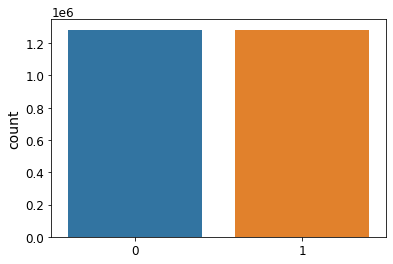

In [ ]:
#import oversampling/undersampling modules
over = SMOTE(random_state=42)
#under/oversample the target variables
train_x, train_y = over.fit_resample(train_x, train_y)
sns.countplot(train_y)

###Oversampling Predicting datasets
Model Training

####Oversampling Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
#create decision tree, limiting the depth and nodes to make it readable
tree=DecisionTreeClassifier(random_state=40,max_depth=10,max_leaf_nodes=25)
#Train and predict dataset to get scores
tree.fit(train_x,train_y)
y_pred=tree.predict(test_x)

print(round(accuracy_score(test_y, y_pred),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = ['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK'],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')



Accuracy: 0.656

              precision    recall  f1-score   support

           0       0.95      0.67      0.78    320845
           1       0.09      0.46      0.15     23061

    accuracy                           0.66    343906
    macro avg       0.52      0.57      0.47    343906
    weighted avg       0.89      0.66      0.74    343906

    Predicted:   Neg    Pos
    True Neg [ 214965 105880]
    True Pos [ 12431  10630 ]

Feature: MFUV, Score: 0.05224
Feature: MNUV, Score: 0.03032
Feature: MU, Score: 0.00000
Feature: MG, Score: 0.03549
Feature: MR, Score: 0.00000
Feature: MI, Score: 0.01798
Feature: MZ, Score: 0.00000
Feature: MY, Score: 0.00000
Feature: MJ, Score: 0.00000
Feature: MH, Score: 0.00000
Feature: MK, Score: 0.86397


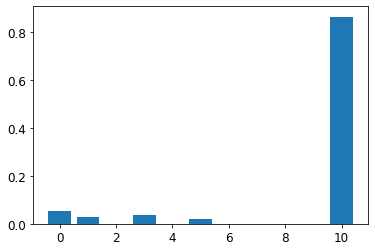

In [ ]:
tree=DecisionTreeClassifier(random_state=40,max_depth=28,max_leaf_nodes=10,min_samples_split=11,criterion='entropy')
#Train and predict dataset to get scores
tree.fit(train_x,train_y)
y_pred=tree.predict(test_x)

importance = tree.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (features[i],v))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

print('\n')
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = ['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK'],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')


In [ ]:
print(round(accuracy_score(test_y, y_pred),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

0.724
     Neg   Pos
Neg [[240276  80569]
 [ 14345   8716]]
              precision    recall  f1-score   support

           0       0.94      0.75      0.84    320845
           1       0.10      0.38      0.16     23061

    accuracy                           0.72    343906
   macro avg       0.52      0.56      0.50    343906
weighted avg       0.89      0.72      0.79    343906



Accuracy: 0.724

              precision    recall  f1-score   support

           0       0.94      0.75      0.84    320845
           1       0.10      0.38      0.16     23061

    accuracy                           0.72    343906
    macro avg       0.52      0.56      0.50    343906
    weighted avg       0.89      0.72      0.79    343906
    
    Predicted:   Neg   Pos
    True Neg [ 240276  80569]
    True Pos [ 14345   8716 ]

####Oversampling LGBM Predictor

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import r2_score
#train_x1, test_x1, train_y1, test_y1

lgb_train = lgb.Dataset(train_x, train_y)

lgb_eval = lgb.Dataset(test_x, test_y, reference=lgb_train)

params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 40,
    "learning_rate": 0.05,
    "feature_fraction": 0.85,
    "reg_lambda": 2,
    "metric": "rmse"
}


gbm = lgb.train(params,
                train_set=lgb_train,
               
                num_boost_round=300,
                valid_sets=lgb_eval,
                early_stopping_rounds=150
                )

lgbm_y_pred = gbm.predict(test_x, num_iteration=gbm.best_iteration)

print('The rmse of prediction is:', mean_squared_error(test_y, lgbm_y_pred) ** 0.5)

In [ ]:
print('The rmse of prediction is:', mean_squared_error(test_y, lgbm_y_pred) ** 0.5)

The rmse of prediction is: 0.4825329689975224


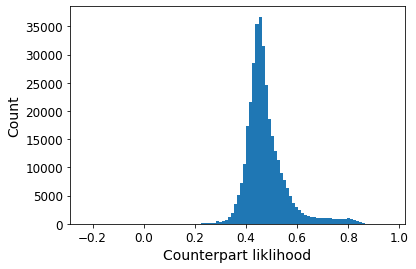

In [ ]:
plt.hist( lgbm_y_pred, bins=100)
plt.xlabel('Counterpart likelihood')
plt.ylabel('Count')
plt.show()

####Oversampling Neural networks

In [ ]:
from keras.layers import Dense, Activation, Flatten,Dropout
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
model=keras.Sequential()

model.add(Dense(len(features[:-1]), kernel_initializer='normal',input_dim = train_x.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(256, kernel_initializer='normal',activation='softmax'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')

callbacks_list = [checkpoint]

model.fit(train_x, train_y, epochs=50, batch_size=512, validation_split = 0.2, callbacks=callbacks_list)

#Relu_history=NN_model.fit(train_x,train_y,epochs=60,validation_split=0.1,callbacks=[early_stopping_cb])
#history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(test_x, test_y)

# Evaluate on test data
print('\n---- Test data ----')
predictions = model.predict(test_x)
accuracy = sklearn.metrics.accuracy_score(test_y, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}%'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(test_y, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(test_y, np.argmax(predictions, axis=1)))


In [ ]:
print('Accuracy: {0:.2f}%'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(test_y, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(test_y, np.argmax(predictions, axis=1)))

Accuracy: 93.29%

              precision    recall  f1-score   support

           0       0.93      1.00      0.97    320845
           1       0.00      0.00      0.00     23061

    accuracy                           0.93    343906
    macro avg      0.47      0.50      0.48    343906
    weighted avg   0.87      0.93      0.90    343906

    Confusion Matrix:
    Predicted   Neg      Pos
    True Neg [ 320845      0 ]
    True Pos [ 23061       0 ]

#Undersampling Methods

##Undersampling Learning on wavebands

Select only columns related to source flux/brightness in bands and counterpart information

In [ ]:
#Selects information on band fluxes and counterpart information only
features=['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK','Counterpart']
all_sources_bands=all_sources[features]
display(all_sources_bands.head(10))
all_sources_bands['Counterpart']=all_sources_bands['Counterpart'].astype('int32')
#all_sources['Separation']=all_sources['Separation'].astype('float32')
#print(all_sources.describe)
for column in all_sources_bands.columns:
  all_sources_bands[column].fillna(all_sources_bands[column].median(),inplace=True)
  all_sources_bands=all_sources_bands[all_sources_bands[column]>-900]
  all_sources_bands=all_sources_bands[all_sources_bands[column]<90]
display(all_sources_bands.head(10))
#print(all_sources_bands.dtypes)
#split into x,y
x_band=all_sources_bands.drop('Counterpart',axis=1)
y_band=all_sources_bands['Counterpart']

#split the data into training and test data sets
from sklearn.model_selection import train_test_split
#print(x_band['Separation_1'].median())
train_x, test_x, train_y, test_y = train_test_split(x_band, y_band, test_size=0.2, random_state=40,stratify=y_band)
sns.countplot(all_sources_bands['Counterpart'])

As the dataset is very unbalanced we need to balance it by synthetically oversampling the data

####Undersampling Artificial Sources

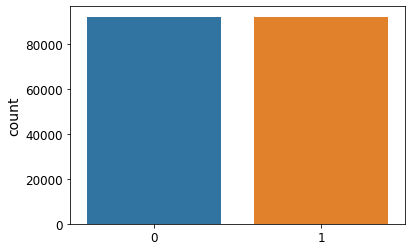

In [ ]:
#import oversampling/undersampling modules
sm = SMOTE(random_state=42)
under=RandomUnderSampler(random_state=42)
#under/oversample the target variables
train_x, train_y = under.fit_resample(train_x, train_y)
sns.countplot(train_y)

###Undersampling Predicting datasets
Model training

####Undersampling Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
#create decision tree, limiting the depth and nodes to make it readable
tree=DecisionTreeClassifier(random_state=40,max_depth=10,max_leaf_nodes=25)
#Train and predict dataset to get scores
tree.fit(train_x,train_y)
y_pred=tree.predict(test_x)

print(round(accuracy_score(test_y, y_pred),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = ['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK'],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')



Accuracy: 0.743

              precision    recall  f1-score   support

           0       0.94      0.77      0.85    320845
           1       0.10      0.36      0.16     23061

    accuracy                           0.74    343906
    macro avg      0.52      0.57      0.50    343906
    weighted avg   0.89      0.74      0.80    343906

    Predicted   Neg     Pos
    True Neg [ 247171  73674]
    True Pos [ 14708   8353 ]

In [ ]:
# define search space
space = dict(criterion = ['gini', 'entropy'],
         max_depth = randint(1, 100), 
         min_samples_split = randint(2, 30), 
         max_leaf_nodes = randint(5, 50))

# define DT classification model
model =DecisionTreeClassifier(random_state=40)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=40)

# define search
search = RandomizedSearchCV(model, space, n_iter=50, scoring='precision', n_jobs=-1, cv=cv, random_state=40)

# execute search
tree = search.fit(train_x, train_y)
tree_y_pred=search.predict(test_x)

print(round(accuracy_score(test_y, tree_y_pred),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y,tree_y_pred))
print(classification_report(test_y,tree_y_pred))
best=tree.best_params_
print(best)
importance = tree.best_estimator_.feature_importances_

Accuracy: 0.8804 <br>


              precision    recall  f1-score   support

          Neg- 0       0.94      0.93      0.94    320845
          Pos- 1       0.14      0.16      0.15     23061

    accuracy                           0.88    343906
    macro avg      0.54      0.55      0.54    343906
    weighted avg   0.89      0.88      0.88    343906

    Predicted:   Neg     Pos
    True Neg [ 299078   21767 ]
    True Pos [ 19371     3690 ]

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(tree.best_estimator_, out_file='tree.dot', 
                feature_names = ['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK'],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
best=tree.best_params_
print(best)
#tree
importance = tree.best_estimator_.feature_importances_
print(importance)

{'criterion': 'entropy', 'max_depth': 1, 'max_leaf_nodes': 43, 'min_samples_split': 18}
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
tree=DecisionTreeClassifier(random_state=40,max_depth=28,max_leaf_nodes=10,min_samples_split=11,criterion='entropy')
#Train and predict dataset to get scores
tree.fit(train_x,train_y)
y_pred=tree.predict(test_x)

importance = tree.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (features[i],v))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

print('\n')
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = ['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK'],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')


Predicted...Negative Positive  
True Neg [ 312572 | 30909  ]  
True Pos [ 28   ....... | ......634]

####Random Forest

In [ ]:
# define search space
space = dict(criterion = ['gini', 'entropy'],
         max_depth = randint(1, 100), 
         min_samples_split = randint(2, 15), 
         max_leaf_nodes = randint(5, 30),
         n_estimators=randint(1,200))

# define DT classification model
model =RandomForestClassifier(random_state=40)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=40)

# define search
search = RandomizedSearchCV(model, space, n_iter=50, scoring='precision', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(train_x, train_y)
forest_y_pred=search.predict(test_x)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print(confusion_matrix(test_y,forest_y_pred))
print(classification_report(test_y,tree_y_pred))
#VISUALISE TREES
fn=['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK']
cn=['False','True']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(result,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [ ]:
#Best Hyperparameters: {'criterion': 'gini', 'max_depth': 56, 'max_leaf_nodes': 29, 'min_samples_split': 11, 'n_estimators': 150}
from sklearn import tree
model =RandomForestClassifier(criterion='gini',max_depth=56,max_leaf_nodes=29,min_samples_split=11,n_estimators=150,random_state=40)
result = model.fit(train_x, train_y)
forest_y_pred=model.predict(test_x)
importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (features[i],v))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

fn=['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK']
cn=['False','True']
'''
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
model.plot_tree(result,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')
'''

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=600)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True,
               rounded=True)
fig.savefig('rf_individualtree.png')
fig.show()
'''
i_tree=0
for tree_in_forest in model.estimators_:
  if (i_tree <1):        
      export_graphviz(tree_in_forest, out_file='tree.dot', 
                feature_names = ['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK'],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)
      os.system('dot -Tpng tree.dot -o tree.png')
      i_tree+=1
      Image(filename = 'tree.png')
'''

####SVM

In [ ]:
#tries threee different kernels
for kernel in ('linear', 'poly', 'rbf'):
 
  if kernel=='poly':
    #if kernel is poly then tries a x^1-5 plane
    for degree in range(1,5):
      svc_classifier=SVC(kernel=kernel,degree=degree)
      print(kernel+' degree-'+str(degree)) 
      svc_classifier.fit(train_x,train_y)

      #predict values
      y_predict=svc_classifier.predict(test_x)

      from sklearn.metrics import classification_report,confusion_matrix
      #print(kernel)
      print(confusion_matrix(test_y,y_predict))
      print(classification_report(test_y,y_predict))
  else:
    svc_classifier=SVC(kernel=kernel)
    svc_classifier.fit(train_x,train_y)

    #predict values
    y_predict=svc_classifier.predict(test_x)

    from sklearn.metrics import classification_report,confusion_matrix
    print(kernel)
    print(confusion_matrix(test_y,y_predict))
    print(classification_report(test_y,y_predict))


In [ ]:
#TAKES TOO LONG!
svc = SVC(probability = True, random_state = 1,class_weight='balanced')
params = {'C': np.arange(0,100,2), 'gamma': np.arange(0.01,1,0.02), 'kernel': ['linear','rbf']}
search=RandomizedSearchCV(svc, param_distributions = params, n_iter = 20, random_state = 1) 

result = search.fit(train_x, train_y)
svm_y_pred=search.predict(test_x)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print(confusion_matrix(test_y,svm_y_pred))
print(classification_report(test_y,svm_y_predict))

In [ ]:

para=result.best_params_
svc = SVC(probability = True, random_state = 1,class_weight='balanced',kernel=para['kernel'],gamma=para['gamma'],C=para['C'])
svc.fit(train_x, train_y)
svm_y_pred=svc.predict(test_x)

importance = svc.coef_[0]
#direction indicates predicted class
#compare the size of each feature
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (features[i],v))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

print(features)
def f_importances(coef, names):
    imp = coef
    #imp,names = zip(*sorted(zip(imp,names)))
    print(imp,names)
    plt.barh(range(len(names)), imp[0], align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
f_importances(svc.coef_, features[:-1])

####LGBM Predictor

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import r2_score
#train_x1, test_x1, train_y1, test_y1

lgb_train = lgb.Dataset(train_x, train_y)

lgb_eval = lgb.Dataset(test_x, test_y, reference=lgb_train)

params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 40,
    "learning_rate": 0.05,
    "feature_fraction": 0.85,
    "reg_lambda": 2,
    "metric": "rmse"
}


gbm = lgb.train(params,
                train_set=lgb_train,
               
                num_boost_round=300,
                valid_sets=lgb_eval,
                early_stopping_rounds=150
                )

lgbm_y_pred = gbm.predict(test_x, num_iteration=gbm.best_iteration)

print('The rmse of prediction is:', mean_squared_error(test_y, lgbm_y_pred) ** 0.5)

In [ ]:
print('The rmse of prediction is:', mean_squared_error(test_y, lgbm_y_pred) ** 0.5)

The rmse of prediction is: 0.4846610090908692


In [ ]:
# root mean squared error
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_y, lgbm_y_pred, squared=True);rmse

0.2348962937329796

####Neural networks

In [ ]:
from keras.layers import Dense, Activation, Flatten,Dropout
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
model=keras.Sequential()

model.add(Dense(len(features[:-1]), kernel_initializer='normal',input_dim = train_x.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(256, kernel_initializer='normal',activation='softmax'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')

callbacks_list = [checkpoint]

model.fit(train_x, train_y, epochs=2000, batch_size=512, validation_split = 0.2, callbacks=callbacks_list)

#Relu_history=NN_model.fit(train_x,train_y,epochs=60,validation_split=0.1,callbacks=[early_stopping_cb])
#history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(test_x, test_y)

# Evaluate on test data
print('\n---- Test data ----')
predictions = model.predict(test_x)
accuracy = sklearn.metrics.accuracy_score(test_y, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}%'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(test_y, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(test_y, np.argmax(predictions, axis=1)))


Accuracy: 93.29%

              precision    recall  f1-score   support

           0       0.93      1.00      0.97    320845
           1       0.00      0.00      0.00     23061

    accuracy                           0.93    343906
    macro avg      0.47      0.50      0.48    343906
    weighted avg   0.87      0.93      0.90    343906
    
    Confusion Matrix:
    Predicted  Neg      Pos
    True Neg [320845      0]
    True Pos [ 23061      0]

##Learning on wavebands-Separation

Select only columns related to source flux/brightness in bands and counterpart information

In [ ]:
#Selects information on band fluxes and counterpart information only
features=['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK','Separation','Counterpart']
all_sources_bands=all_sources[features]
display(all_sources_bands.head(10))
all_sources_bands['Counterpart']=all_sources_bands['Counterpart'].astype('int32')
all_sources['Separation']=all_sources['Separation'].astype('float32')
#print(all_sources.describe)
for column in all_sources_bands.columns:
  all_sources_bands[column].fillna(all_sources_bands[column].median(),inplace=True)
  all_sources_bands=all_sources_bands[all_sources_bands[column]>-900]
  all_sources_bands=all_sources_bands[all_sources_bands[column]<90]
display(all_sources_bands.head(10))
#print(all_sources_bands.dtypes)
#split into x,y
x_band=all_sources_bands.drop('Counterpart',axis=1)
y_band=all_sources_bands['Counterpart']

#split the data into training and test data sets
from sklearn.model_selection import train_test_split
#print(x_band['Separation_1'].median())
train_x, test_x, train_y, test_y = train_test_split(x_band, y_band, test_size=0.2, random_state=40,stratify=y_band)
sns.countplot(all_sources_bands['Counterpart'])

As the dataset is very unbalanced we need to balance it by synthetically oversampling the data

####Undersampling Artificial Sources

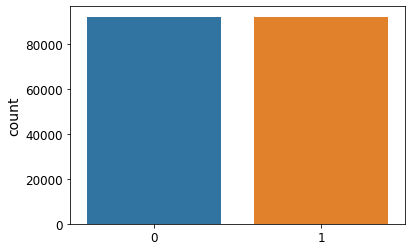

In [ ]:
#import oversampling/undersampling modules
sm = SMOTE(random_state=42)
under=RandomUnderSampler(random_state=42)
#under/oversample the target variables
train_x, train_y = under.fit_resample(train_x, train_y)
sns.countplot(train_y)

###Predicting datasets

####Decision Tree

In [ ]:
#create decision tree, limiting the depth and nodes to make it readable
tree=DecisionTreeClassifier(random_state=40,max_depth=10,max_leaf_nodes=25)
#Train and predict dataset to get scores
tree.fit(train_x,train_y)
y_pred=tree.predict(test_x)

print(round(accuracy_score(test_y, y_pred),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = ['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK','Separation'],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')



Accuracy: 1.0

              precision    recall  f1-score   support

          Neg:        0      1.00      1.00      1.00    320845
          Pos:        1      1.00      1.00      1.00     23061

    accuracy                           1.00    343906
    macro avg      1.00      1.00      1.00    343906
    weighted avg   1.00      1.00      1.00    343906

            Neg       Pos
      Neg [ 320840      5 ]
      Pos [ 0       23061 ]

Optimising Decision Tree for better classification

In [ ]:
# define search space
space = dict(criterion = ['gini', 'entropy'],
         max_depth = randint(1, 100), 
         min_samples_split = randint(2, 30), 
         max_leaf_nodes = randint(5, 50))

# define DT classification model
model =DecisionTreeClassifier(random_state=40)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=40)

# define search
search = RandomizedSearchCV(model, space, n_iter=50, scoring='precision', n_jobs=-1, cv=cv, random_state=40)

# execute search
tree = search.fit(train_x, train_y)
tree_y_pred=search.predict(test_x)

print(round(accuracy_score(test_y, tree_y_pred),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y,tree_y_pred))
print(classification_report(test_y,tree_y_pred))
best=tree.best_params_
print(best)

1.0
     Neg   Pos
Neg [[320840      5]
 [     0  23061]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    320845
           1       1.00      1.00      1.00     23061

    accuracy                           1.00    343906
   macro avg       1.00      1.00      1.00    343906
weighted avg       1.00      1.00      1.00    343906

{'criterion': 'gini', 'max_depth': 92, 'max_leaf_nodes': 12, 'min_samples_split': 7}


Accuracy: 100%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    320845
           1       1.00      1.00      1.00     23061

    accuracy                           1.00    343906
    macro avg      1.00      1.00      1.00    343906
    weighted avg   1.00      1.00      1.00    343906

    Predicted   Neg      Pos
    True Neg [320840        5]
    True Pos [     0    23061]

In [ ]:

importance = tree.best_iteration.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (features[i],v))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
# Export as dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = features[:-1],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
tree=DecisionTreeClassifier(random_state=40,max_depth=best['max_depth'],max_leaf_nodes=best['max_leaf_nodes'],
                            min_samples_split=best['min_samples_split'],criterion=best['criterion'])
#Train and predict dataset to get scores
tree.fit(train_x,train_y)
y_pred=tree.predict(test_x)

importance = tree.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (features[i],v))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Export as dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = features[:-1],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')


In [ ]:
print(round(accuracy_score(test_y, tree_y_pred),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y,tree_y_pred))
print(classification_report(test_y,tree_y_pred))

1.0
     Neg   Pos
Neg [[320840      5]
 [     0  23061]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    320845
           1       1.00      1.00      1.00     23061

    accuracy                           1.00    343906
   macro avg       1.00      1.00      1.00    343906
weighted avg       1.00      1.00      1.00    343906



Accuracy: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    320845
           1       1.00      1.00      1.00     23061

    accuracy                           1.00    343906
    macro avg      1.00      1.00      1.00    343906
    weighted avg   1.00      1.00      1.00    343906

    Predicted      Neg     Pos
    True Neg  [ 320840       5]
    True Pos  [     0    23061]

####Random Forest

In [ ]:
# define search space
space = dict(criterion = ['gini', 'entropy'],
         max_depth = randint(1, 100), 
         min_samples_split = randint(2, 15), 
         max_leaf_nodes = randint(5, 30),
         n_estimators=randint(1,200))

# define DT classification model
model =RandomForestClassifier(random_state=40)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=40)

# define search
search = RandomizedSearchCV(model, space, n_iter=50, scoring='precision', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(train_x, train_y)
forest_y_pred=search.predict(test_x)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print(confusion_matrix(test_y,forest_y_pred))
print(classification_report(test_y,forest_y_pred))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

''
#VISUALISE TREES
fn=features[:-1]
cn=['False','True']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(result,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')
'''
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [ ]:
#Best Hyperparameters: {'criterion': 'gini', 'max_depth': 56, 'max_leaf_nodes': 29, 'min_samples_split': 11, 'n_estimators': 150}
from sklearn import tree
best=result.best_params_
model =RandomForestClassifier(criterion=best['criterion'],max_depth=best['max_depth'],
                              max_leaf_nodes=best['max_leaf_nodes'],min_samples_split=best['min_samples_split']
                              ,n_estimators=best['n_estimators'],random_state=40)
result = model.fit(train_x, train_y)
forest_y_pred=model.predict(test_x)
importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (features[i],v))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

fn=features[:-1]
cn=['False','True']
'''
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
model.plot_tree(result,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')
'''

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=600)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True,
               rounded=True)
fig.savefig('rf_individualtree.png')
fig.show()
'''
i_tree=0
for tree_in_forest in model.estimators_:
  if (i_tree <1):        
      export_graphviz(tree_in_forest, out_file='tree.dot', 
                feature_names = ['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK'],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)
      os.system('dot -Tpng tree.dot -o tree.png')
      i_tree+=1
      Image(filename = 'tree.png')
'''

####SVM

In [ ]:
#tries threee different kernels
for kernel in ('linear', 'poly', 'rbf'):
 
  if kernel=='poly':
    #if kernel is poly then tries a x^1-5 plane
    for degree in range(1,5):
      svc_classifier=SVC(kernel=kernel,degree=degree)
      print(kernel+' degree-'+str(degree)) 
      svc_classifier.fit(train_x,train_y)

      #predict values
      y_predict=svc_classifier.predict(test_x)
      #print(kernel)
      print(confusion_matrix(test_y,y_predict))
      print(classification_report(test_y,y_predict))
  else:
    svc_classifier=SVC(kernel=kernel)
    svc_classifier.fit(train_x,train_y)

    #predict values
    y_predict=svc_classifier.predict(test_x)
    print(kernel)
    print(confusion_matrix(test_y,y_predict))
    print(classification_report(test_y,y_predict))


In [ ]:
#TAKES TOO LONG!
svc = SVC(probability = True, random_state = 1,class_weight='balanced')
params = {'C': np.arange(0,100,2), 'gamma': np.arange(0.01,1,0.02), 'kernel': ['linear','rbf']}
search=RandomizedSearchCV(svc, param_distributions = params, n_iter = 20, random_state = 1) 

result = search.fit(train_x, train_y)
svm_y_pred=search.predict(test_x)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print(confusion_matrix(test_y,svm_y_pred))
print(classification_report(test_y,svm_y_pred))

In [ ]:

para=result.best_params_
svc = SVC(probability = True, random_state = 1,class_weight='balanced',kernel=para['kernel'],gamma=para['gamma'],C=para['C'])
svc.fit(train_x, train_y)
svm_y_pred=svc.predict(test_x)

importance = svc.coef_[0]
#direction indicates predicted class
#compare the size of each feature
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (features[i],v))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

print(features)
def f_importances(coef, names):
    imp = coef
    #imp,names = zip(*sorted(zip(imp,names)))
    print(imp,names)
    plt.barh(range(len(names)), imp[0], align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
f_importances(svc.coef_, features[:-1])

####LightGBM Predictor

In [ ]:
#train_x1, test_x1, train_y1, test_y1
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import r2_score

lgb_train = lgb.Dataset(train_x, train_y)

lgb_eval = lgb.Dataset(test_x, test_y, reference=lgb_train)

params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 40,
    "learning_rate": 0.05,
    "feature_fraction": 0.85,
    "reg_lambda": 2,
    "metric": "rmse"
}


gbm = lgb.train(params,
                train_set=lgb_train,
               
                num_boost_round=300,
                valid_sets=lgb_eval,
                early_stopping_rounds=150
                )

lgbm_y_pred = gbm.predict(test_x, num_iteration=gbm.best_iteration)

print('The rmse of prediction is:', mean_squared_error(test_y, lgbm_y_pred) ** 0.5)

In [ ]:
print('The rmse of prediction is:', mean_squared_error(test_y, lgbm_y_pred) ** 0.5)

The rmse of prediction is: 0.00931974934336309


####Neural networks

In [ ]:
model=keras.Sequential()

model.add(Dense(len(features[:-1]), kernel_initializer='normal',input_dim = train_x.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(256, kernel_initializer='normal',activation='softmax'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')

callbacks_list = [checkpoint]

model.fit(train_x, train_y, epochs=2000, batch_size=512, validation_split = 0.2, callbacks=callbacks_list)

#Relu_history=NN_model.fit(train_x,train_y,epochs=60,validation_split=0.1,callbacks=[early_stopping_cb])
#history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(test_x, test_y)


In [ ]:
# Evaluate on test data
print('\n---- Test data ----')
predictions = model.predict(test_x)
accuracy = sklearn.metrics.accuracy_score(test_y, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}%'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(test_y, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(test_y, np.argmax(predictions, axis=1)))



---- Test data ----
Accuracy: 93.29%
Classification Report:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.93      1.00      0.97    320845
           1       0.00      0.00      0.00     23061

    accuracy                           0.93    343906
   macro avg       0.47      0.50      0.48    343906
weighted avg       0.87      0.93      0.90    343906

Confusion Matrix:
[[320845      0]
 [ 23061      0]]


Accuracy: 93.29%

              precision    recall  f1-score   support

           0       0.93      1.00      0.97    320845
           1       0.00      0.00      0.00     23061

    accuracy                           0.93    343906
    macro avg       0.47      0.50      0.48    343906
    weighted avg       0.87      0.93      0.90    343906
    
    Confusion Matrix:
    Predicted    Neg     Pos
    True Neg [ 320845      0]
    True Pos [ 23061       0]

##Learning on Features

Select only columns related to source flux/brightness in bands and counterpart information

In [ ]:
#Selects information on band fluxes and counterpart information only
features=['SFR_best',	'age',	'zBEST',	'mass_best','Counterpart']

all_sources_bands=all_sources[features]

all_sources_bands['Counterpart']=all_sources_bands['Counterpart'].astype('int32')
#all_sources['Separation']=all_sources['Separation'].astype('float32')
#print(all_sources.describe)
for column in all_sources_bands.columns:
  all_sources_bands[column].fillna(all_sources_bands[column].mean(),inplace=True)

all_sources_bands['SFR_best'].replace(-999,all_sources_bands[column].mean(),inplace=True)
all_sources_bands=all_sources_bands[~all_sources_bands.isin([np.nan, np.inf, -np.inf]).any(1)]
#print(all_sources_bands.dtypes)
#split into x,y
display(all_sources_bands.head(10))
x_band=all_sources_bands.drop('Counterpart',axis=1)
y_band=all_sources_bands['Counterpart']

#split the data into training and test data sets
train_x, test_x, train_y, test_y = train_test_split(x_band, y_band, test_size=0.2, random_state=40,stratify=y_band)
sns.countplot(all_sources_bands['Counterpart'])

As the dataset is very unbalanced we need to balance it by synthetically oversampling the data

####Features Artificial Sources

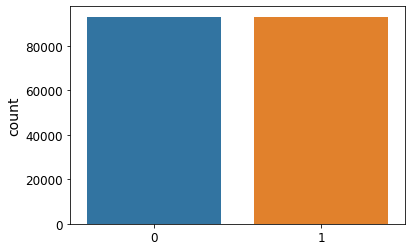

In [ ]:
#import oversampling/undersampling modules
sm = SMOTE(random_state=42)
under=RandomUnderSampler(random_state=42)
#under/oversample the target variables
train_x, train_y = under.fit_resample(train_x, train_y)
sns.countplot(train_y)

###Features Predicting datasets

####Features Decision Tree

In [ ]:
#create decision tree, limiting the depth and nodes to make it readable
dtree=DecisionTreeClassifier(random_state=40,max_depth=10,max_leaf_nodes=25)
#Train and predict dataset to get scores
dtree.fit(train_x,train_y)
y_pred=dtree.predict(test_x)

print(round(accuracy_score(test_y, y_pred),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(dtree, out_file='tree.dot', 
                feature_names = features[:-1],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')

Accuracy: 0.6749

              precision    recall  f1-score   support

           0       0.95      0.69      0.80    323127
           1       0.10      0.48      0.16     23286

    accuracy                           0.67    346413
    macro avg       0.52      0.58      0.48    346413
    weighted avg       0.89      0.67      0.76    346413
    Predicted    Neg        Pos
    True Neg [ 222708     100419]
    True Pos [ 12209      11077 ]


Feature: SFR_best, Score: 0.06847
Feature: age, Score: 0.00682
Feature: zBEST, Score: 0.29853
Feature: mass_best, Score: 0.62618


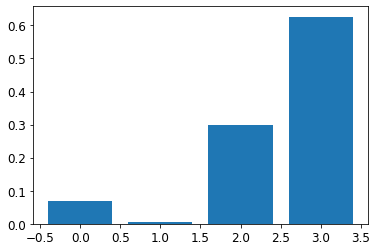

In [ ]:

importance = dtree.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (features[i],v))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
features=['SFR_best',	'age',	'zBEST',	'mass_best','Counterpart']

In [ ]:
# define search space
space = dict(criterion = ['gini', 'entropy'],
         max_depth = randint(1, 100), 
         min_samples_split = randint(2, 30), 
         max_leaf_nodes = randint(5, 50))

# define DT classification model
model =DecisionTreeClassifier(random_state=40)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=40)

# define search
search = RandomizedSearchCV(model, space, n_iter=50, scoring='precision', n_jobs=-1, cv=cv, random_state=40)

# execute search
dtree = search.fit(train_x, train_y)
tree_y_pred=search.predict(test_x)

print(round(accuracy_score(test_y, tree_y_pred),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y,tree_y_pred))
print(classification_report(test_y,tree_y_pred))
best=dtree.best_params_
print(best)



dtree=DecisionTreeClassifier(random_state=40,max_depth=best['max_depth'],
                             max_leaf_nodes=best['max_leaf_nodes'],criterion=best['criterion'],
                             min_samples_split=best['min_samples_split'])
dtree.fit(train_x,train_y)
y_pred=dtree.predict(test_x)
importance = dtree.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (features[i],v))
# Export as dot file
export_graphviz(dtree, out_file='tree.dot', 
                feature_names = features[:-1],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')




plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
features=['SFR_best',	'age',	'zBEST',	'mass_best','Counterpart']


####Features Random Forest

In [ ]:
# define search space
space = dict(criterion = ['gini', 'entropy'],
         max_depth = randint(1, 100), 
         min_samples_split = randint(2, 15), 
         max_leaf_nodes = randint(5, 30),
         n_estimators=randint(1,200))

# define DT classification model
model =RandomForestClassifier(random_state=40)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=40)

# define search
search = RandomizedSearchCV(model, space, n_iter=50, scoring='precision', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(train_x, train_y)
forest_y_pred=search.predict(test_x)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print(classification_report(test_y,forest_y_pred))
best=result.best_params_
model =RandomForestClassifier(criterion=best['criterion'],max_depth=best['max_depth'],
                              max_leaf_nodes=best['max_leaf_nodes'],
                              min_samples_split=best['min_samples_split'],
                              n_estimators=best['n_estimators'],random_state=40)
result = model.fit(train_x, train_y)
forest_y_pred=model.predict(test_x)
importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (features[i],v))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


#VISUALISE TREES
fn=features[:-1]
cn=['False','True']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(result,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

####Features SVM

In [ ]:
#tries threee different kernels
for kernel in ('linear', 'poly', 'rbf'):
 
  if kernel=='poly':
    #if kernel is poly then tries a x^1-5 plane
    for degree in range(1,5):
      svc_classifier=SVC(kernel=kernel,degree=degree)
      print(kernel+' degree-'+str(degree)) 
      svc_classifier.fit(train_x,train_y)

      #predict values
      y_predict=svc_classifier.predict(test_x)
      #print(kernel)
      print(confusion_matrix(test_y,y_predict))
      print(classification_report(test_y,y_predict))
  else:
    svc_classifier=SVC(kernel=kernel)
    svc_classifier.fit(train_x,train_y)

    #predict values
    y_predict=svc_classifier.predict(test_x)
    print(kernel)
    print(confusion_matrix(test_y,y_predict))
    print(classification_report(test_y,y_predict))


In [ ]:
svc = SVC(probability = True, random_state = 1,class_weight='balanced')
params = {'C': np.arange(0,100,2), 'gamma': np.arange(0.01,1,0.02), 'kernel': ['linear','rbf']}
search=RandomizedSearchCV(svc, param_distributions = params, n_iter = 20, random_state = 40) 

result = search.fit(train_x, train_y)
svm_y_pred=search.predict(test_x)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print(confusion_matrix(test_y,svm_y_pred))

para=result.best_params_
svc = SVC(probability = True, random_state = 1,class_weight='balanced',kernel=para['kernel'],gamma=para['gamma'],C=para['C'])
svc.fit(train_x, train_y)
svm_y_pred=svc.predict(test_x)

importance = svc.coef_[0]
#direction indicates predicted class
#compare the size of each feature
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (features[i],v))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

print(features)
def f_importances(coef, names):
    imp = coef
    #imp,names = zip(*sorted(zip(imp,names)))
    print(imp,names)
    plt.barh(range(len(names)), imp[0], align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
f_importances(svc.coef_, features[:-1])

####Features LightGBM Predictor

In [ ]:
#train_x1, test_x1, train_y1, test_y1

lgb_train = lgb.Dataset(train_x, train_y)

lgb_eval = lgb.Dataset(test_x, test_y, reference=lgb_train)

params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 40,
    "learning_rate": 0.05,
    "feature_fraction": 0.85,
    "reg_lambda": 2,
    "metric": "rmse"
}


gbm = lgb.train(params,
                train_set=lgb_train,
               
                num_boost_round=300,
                valid_sets=lgb_eval,
                early_stopping_rounds=150
                )

lgbm_y_pred = gbm.predict(test_x, num_iteration=gbm.best_iteration)

print('The rmse of prediction is:', mean_squared_error(test_y, lgbm_y_pred) ** 0.5)

In [ ]:
print('The rmse of prediction is:', mean_squared_error(test_y, lgbm_y_pred) ** 0.5)

The rmse of prediction is: 0.4832190095128263


(array([2.0000e+00, 4.0000e+00, 4.0000e+00, 6.0000e+00, 8.0000e+00,
        8.0000e+00, 1.0000e+01, 1.8000e+01, 2.1000e+01, 1.7000e+01,
        2.1000e+01, 2.4000e+01, 2.9000e+01, 1.0200e+02, 1.8000e+02,
        1.8500e+02, 4.0000e+02, 1.1180e+03, 1.9840e+03, 3.0320e+03,
        3.3480e+03, 6.7210e+03, 7.8250e+03, 1.4312e+04, 2.6109e+04,
        3.3059e+04, 2.3903e+04, 1.4819e+04, 1.5562e+04, 1.5862e+04,
        1.4163e+04, 1.2074e+04, 1.1158e+04, 1.0714e+04, 1.0284e+04,
        9.8230e+03, 8.5620e+03, 8.1760e+03, 7.9990e+03, 9.5640e+03,
        6.6540e+03, 5.9760e+03, 6.0330e+03, 5.4430e+03, 4.8570e+03,
        4.6510e+03, 3.4010e+03, 3.2130e+03, 3.2610e+03, 3.1430e+03,
        2.6000e+03, 2.2080e+03, 2.0820e+03, 2.0000e+03, 1.7540e+03,
        1.6590e+03, 1.3840e+03, 1.2820e+03, 1.1610e+03, 1.0690e+03,
        9.6200e+02, 8.9900e+02, 7.9600e+02, 6.4300e+02, 6.9300e+02,
        6.4200e+02, 6.5200e+02, 6.5000e+02, 5.1100e+02, 4.8200e+02,
        5.6900e+02, 3.1400e+02, 3.5400e+02, 4.02

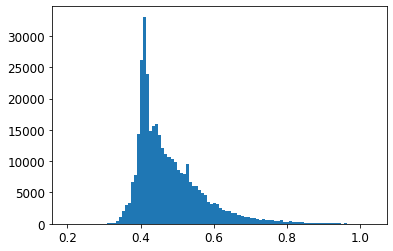

In [ ]:
plt.hist(lgbm_y_pred,bins=100)

####Features Neural networks

In [ ]:
model=keras.Sequential()

model.add(Dense(len(features[:-1]), kernel_initializer='normal',input_dim = train_x.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(256, kernel_initializer='normal',activation='softmax'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')

callbacks_list = [checkpoint]

model.fit(train_x, train_y, epochs=2000, batch_size=512, validation_split = 0.2, callbacks=callbacks_list)

#Relu_history=NN_model.fit(train_x,train_y,epochs=60,validation_split=0.1,callbacks=[early_stopping_cb])
#history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(test_x, test_y)

# Evaluate on test data
print('\n---- Test data ----')
predictions = model.predict(test_x)
accuracy = sklearn.metrics.accuracy_score(test_y, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}%'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(test_y, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(test_y, np.argmax(predictions, axis=1)))


Epoch 1/2
292/292 [==============================] - 4s 11ms/step - loss: 0.0000e+00 - accuracy: 0.3750 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00001: val_loss improved from inf to 0.00000, saving model to Weights-001--0.00000.hdf5
Epoch 2/2
292/292 [==============================] - 3s 11ms/step - loss: 0.0000e+00 - accuracy: 0.3750 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 0.00000
10826/10826 [==============================] - 12s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0672

---- Test data ----
Accuracy: 93.28%
Classification Report:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.93      1.00      0.97    323127
           1       0.00      0.00      0.00     23286

    accuracy                           0.93    346413
   macro avg       0.47      0.50      0.48    346413
weighted avg       0.87      0.93      0.90    346413

Confusion Matrix:
[[323127      0]
 [ 23286      0]]


In [ ]:
print('Accuracy: {0:.2f}%'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(test_y, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(test_y, np.argmax(predictions, axis=1)))

Accuracy: 93.28%
Classification Report:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.93      1.00      0.97    323127
           1       0.00      0.00      0.00     23286

    accuracy                           0.93    346413
   macro avg       0.47      0.50      0.48    346413
weighted avg       0.87      0.93      0.90    346413

Confusion Matrix:
[[323127      0]
 [ 23286      0]]


Accuracy: 93.28%

              precision    recall  f1-score   support

           0       0.93      1.00      0.97    323127
           1       0.00      0.00      0.00     23286

    accuracy                           0.93    346413
    macro avg       0.47      0.50      0.48    346413
    weighted avg       0.87      0.93      0.90    346413
    
    Confusion Matrix:
    Predicted      Neg    Pos
    True Neg  [ 323127      0]
    True Pos  [ 23286       0]


##Learning on features-Separation

Select only columns related to source flux/brightness in bands and counterpart information

In [ ]:
#Selects information on band fluxes and counterpart information only
features=['SFR_best',	'age',	'zBEST',	'mass_best','Separation','Counterpart']

all_sources_bands=all_sources[features]

all_sources_bands['Counterpart']=all_sources_bands['Counterpart'].astype('int32')
#all_sources['Separation']=all_sources['Separation'].astype('float32')
#print(all_sources.describe)
for column in all_sources_bands.columns:
  all_sources_bands[column].fillna(all_sources_bands[column].mean(),inplace=True)

all_sources_bands['SFR_best'].replace(-999,all_sources_bands[column].mean(),inplace=True)
all_sources_bands=all_sources_bands[~all_sources_bands.isin([np.nan, np.inf, -np.inf]).any(1)]
#print(all_sources_bands.dtypes)
#split into x,y
display(all_sources_bands.head(10))
x_band=all_sources_bands.drop('Counterpart',axis=1)
y_band=all_sources_bands['Counterpart']

#split the data into training and test data sets
train_x, test_x, train_y, test_y = train_test_split(x_band, y_band, test_size=0.2, random_state=40,stratify=y_band)
sns.countplot(all_sources_bands['Counterpart'])

As the dataset is very unbalanced we need to balance it by synthetically oversampling the data

####Artificial Sources

In [ ]:
#import oversampling/undersampling modules
sm = SMOTE(random_state=42)
under=RandomUnderSampler(random_state=42)
#under/oversample the target variables
train_x, train_y = under.fit_resample(train_x, train_y)
sns.countplot(train_y)

###Predicting datasets

####Decision Tree

In [ ]:
#create decision tree, limiting the depth and nodes to make it readable
tree=DecisionTreeClassifier(random_state=40,max_depth=10,max_leaf_nodes=25)
#Train and predict dataset to get scores
tree.fit(train_x,train_y)
y_pred=tree.predict(test_x)

print(round(accuracy_score(test_y, y_pred),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y,y_pred))
print(classification_report(test_y,y_pred))

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = features[:-1],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')



Accuracy: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    323127
           1       1.00      1.00      1.00     23286

    accuracy                           1.00    346413
    macro avg       1.00      1.00      1.00    346413
    weighted avg       1.00      1.00      1.00    346413
    
    Predicted    Neg       Pos
    True Neg  [323127         0]
    True Pos  [     1     23285]

In [ ]:
# define search space
space = dict(criterion = ['gini', 'entropy'],
         max_depth = randint(1, 100), 
         min_samples_split = randint(2, 30), 
         max_leaf_nodes = randint(5, 50))

# define DT classification model
model =DecisionTreeClassifier(random_state=40)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=40)

# define search
search = RandomizedSearchCV(model, space, n_iter=50, scoring='precision', n_jobs=-1, cv=cv, random_state=40)

# execute search
tree = search.fit(train_x, train_y)
tree_y_pred=search.predict(test_x)

print(round(accuracy_score(test_y, tree_y_pred),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y,tree_y_pred))
print(classification_report(test_y,tree_y_pred))
best=tree.best_params_
print(best)
#importance = tree.feature_importances_
'''
# Export as dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = ['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK'],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')
'''

####Random Forest

In [ ]:
# define search space
space = dict(criterion = ['gini', 'entropy'],
         max_depth = randint(1, 100), 
         min_samples_split = randint(2, 15), 
         max_leaf_nodes = randint(5, 30),
         n_estimators=randint(1,200))

# define DT classification model
model =RandomForestClassifier(random_state=40)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=40)

# define search
search = RandomizedSearchCV(model, space, n_iter=50, scoring='precision', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(train_x, train_y)
forest_y_pred=search.predict(test_x)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print(confusion_matrix(test_y,forest_y_pred))
print(classification_report(test_y,tree_y_pred))
#VISUALISE TREES
fn=features[:-1]
cn=['False','True']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(result,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [ ]:
#Best Hyperparameters: {'criterion': 'gini', 'max_depth': 56, 'max_leaf_nodes': 29, 'min_samples_split': 11, 'n_estimators': 150}
best=result.best_params_
model =RandomForestClassifier(criterion=best['criterion'],max_depth=best['max_depth'],
                              max_leaf_nodes=best['max_leaf_nodes'],min_samples_split=best['min_samples_split']
                              ,n_estimators=best['n_estimators'],random_state=40)
result = model.fit(train_x, train_y)
forest_y_pred=model.predict(test_x)
importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (features[i],v))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

fn=features[:-1]
cn=['False','True']
'''
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
model.plot_tree(result,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')
'''

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=600)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True,
               rounded=True)
fig.savefig('rf_individualtree.png')
fig.show()
'''
i_tree=0
for tree_in_forest in model.estimators_:
  if (i_tree <1):        
      export_graphviz(tree_in_forest, out_file='tree.dot', 
                feature_names = ['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK'],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)
      os.system('dot -Tpng tree.dot -o tree.png')
      i_tree+=1
      Image(filename = 'tree.png')
'''

####SVM

In [ ]:
#tries threee different kernels
for kernel in ('linear', 'poly', 'rbf'):
 
  if kernel=='poly':
    #if kernel is poly then tries a x^1-5 plane
    for degree in range(1,5):
      svc_classifier=SVC(kernel=kernel,degree=degree)
      print(kernel+' degree-'+str(degree)) 
      svc_classifier.fit(train_x,train_y)

      #predict values
      y_predict=svc_classifier.predict(test_x)
      #print(kernel)
      print(confusion_matrix(test_y,y_predict))
      print(classification_report(test_y,y_predict))
  else:
    svc_classifier=SVC(kernel=kernel)
    svc_classifier.fit(train_x,train_y)

    #predict values
    y_predict=svc_classifier.predict(test_x)
    print(kernel)
    print(confusion_matrix(test_y,y_predict))
    print(classification_report(test_y,y_predict))


In [ ]:
#TAKES TOO LONG!
svc = SVC(probability = True, random_state = 1,class_weight='balanced')
params = {'C': np.arange(0,100,2), 'gamma': np.arange(0.01,1,0.02), 'kernel': ['linear','rbf']}
search=RandomizedSearchCV(svc, param_distributions = params, n_iter = 20, random_state = 1) 

result = search.fit(train_x, train_y)
svm_y_pred=search.predict(test_x)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print(confusion_matrix(test_y,svm_y_pred))
print(classification_report(test_y,svm_y_predict))

In [ ]:

para=result.best_params_
svc = SVC(probability = True, random_state = 1,class_weight='balanced',kernel=para['kernel'],gamma=para['gamma'],C=para['C'])
svc.fit(train_x, train_y)
svm_y_pred=svc.predict(test_x)

importance = svc.coef_[0]
#direction indicates predicted class
#compare the size of each feature
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (features[i],v))

plt.figure()
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

print(features)
def f_importances(coef, names):
    imp = coef
    #imp,names = zip(*sorted(zip(imp,names)))
    print(imp,names)
    plt.barh(range(len(names)), imp[0], align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
f_importances(svc.coef_, features[:-1])

####LightGBM Predictor

In [ ]:
#train_x1, test_x1, train_y1, test_y1

lgb_train = lgb.Dataset(train_x, train_y)

lgb_eval = lgb.Dataset(test_x, test_y, reference=lgb_train)

params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 40,
    "learning_rate": 0.05,
    "feature_fraction": 0.85,
    "reg_lambda": 2,
    "metric": "rmse"
}


gbm = lgb.train(params,
                train_set=lgb_train,
               
                num_boost_round=300,
                valid_sets=lgb_eval,
                early_stopping_rounds=150
                )

lgbm_y_pred = gbm.predict(test_x, num_iteration=gbm.best_iteration)

print('The rmse of prediction is:', mean_squared_error(test_y, lgbm_y_pred) ** 0.5)

In [ ]:
print('The rmse of prediction is:', mean_squared_error(test_y, lgbm_y_pred) ** 0.5)

The rmse of prediction is: 0.0019320597108708531


In [ ]:
plt.hist(lgbm_y_pred, bins=100)

####Neural networks

In [ ]:
model=keras.Sequential()

model.add(Dense(len(features[:-1]), kernel_initializer='normal',input_dim = train_x.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(256, kernel_initializer='normal',activation='softmax'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')

callbacks_list = [checkpoint]

model.fit(train_x, train_y, epochs=2000, batch_size=512, validation_split = 0.2, callbacks=callbacks_list)

#Relu_history=NN_model.fit(train_x,train_y,epochs=60,validation_split=0.1,callbacks=[early_stopping_cb])
#history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)
model.evaluate(test_x, test_y)

# Evaluate on test data
print('\n---- Test data ----')
predictions = model.predict(test_x)
accuracy = sklearn.metrics.accuracy_score(test_y, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}%'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(test_y, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(test_y, np.argmax(predictions, axis=1)))


###Auto Machine Learning 
https://pypi.org/project/mljar-supervised/

In [ ]:
#!pip install mljar-supervised
#!pip install delayed

In [ ]:
from supervised.automl import AutoML

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [ ]:
automl = AutoML()
automl.fit( train_x, train_y)
predictions = automl.predict( test_x)

In [ ]:
print(predictions)
print("Test accuracy:", accuracy_score(test_y, predictions))

In [ ]:
print('   Neg',' Pos','\n',confusion_matrix(test_y,predictions) )
print(classification_report(test_y,predictions))

   Neg  Pos 
 [[323127      0]
 [     1  23285]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    323127
           1       1.00      1.00      1.00     23286

    accuracy                           1.00    346413
   macro avg       1.00      1.00      1.00    346413
weighted avg       1.00      1.00      1.00    346413



Accuracy: 99%


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    323127
           1       1.00      1.00      1.00     23286

    accuracy                           1.00    346413
    macro avg       1.00      1.00      1.00    346413
    weighted avg       1.00      1.00      1.00    346413

    Predicted:    Neg       Pos 
    True Neg [ 323127         0]
    True Pos [      1     23285]

Auto Machine Learning 
https://pypi.org/project/mljar-supervised/

#Finding counterparts for Optical data at s threshold of 5% of random data (Oisín)

###Optical Dataset 5% of random data
Cosmos dataset matched with VLA Radio data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# HOR (Herschel Optical Radio Counterparts)
from astropy.table import Table #to read the .FITS file

hor_5 = Table.read(f'/content/drive/MyDrive/Herschel/all_opitical_matched_to_5_percent_radio.fits', format='fits').to_pandas()
hor_5.drop('col1',axis=1,inplace=True) #remove null columns
hor_5 = hor_5.rename(columns={'F_BLIND_MF_SPIRE_250': 'H_250_flux','F_BLIND_MF_SPIRE_350': 'H_350_flux','F_BLIND_MF_SPIRE_500': 'H_500_flux','flux_match':'Radio_flux'})
hor_5[100:102] #216 matches #contains NANs for Optical Data

Id       alpha    delta  zBEST  type    zPDF  zPDF_l68  zPDF_u68  zMinChi2  chi2_best       zp_2        chi2_2  NbFilt    zq      chiq     modq   mods       chis  maskUVISTA  maskHSC  maskSCAM  mask  model           age  extinction       MFUV       MNUV         MU         MG        MR         MI        MZ         MY         MJ         MH         MK  mass_med  mass_med_min68  mass_med_max68  mass_best  SFR_med  SFR_med_min68  SFR_med_max68  SFR_best  sSFR_med  sSFR_med_min68  sSFR_med_max68  sSFR_best   L_nu    L_r    L_k  Herschel_RA  Herschel_Dec  H_250_flux  FErr_BLIND_MF_SPIRE_250  H_350_flux  FErr_BLIND_MF_SPIRE_350  H_500_flux  FErr_BLIND_MF_SPIRE_500   r   P  RA_pix  Dec_pix  F_BLIND_pix_SPIRE_250  FErr_BLIND_pix_SPIRE_250  ID_match Project_match Time_match  RA  RA_ERR_match  DEC  DEC_ERR_match  Radio_flux  flux_err_match  RMS_match  SNR_match  NPIX_match  RES_match  Multi_match  GroupID_2  GroupSize_2  Separation_2   s  s_norm  GroupID  GroupSize  Separation
100  96.0  151.048569  1.39154  -99.0   0.0  1.6299    0.3901    2.1224   0.44639   0.073839   1.640000  2.992727e-01     6.0  1.19  0.270166  10027.0 -220.0   1.721648         1.0      0.0       1.0   1.0   11.0  5.000000e+07         0.3 -17.778521 -17.932961 -18.913280 -19.207939 -19.61754 -19.382971 -19.60166 -19.754459 -19.872160 -20.091440 -19.944010   9.07747         8.64546         9.50713    8.43983  0.52346        0.24460        0.88962    1.0980  -8.52515        -9.05925        -8.00412     -7.342  9.767  9.084  8.162          NaN           NaN         NaN                      NaN         NaN                      NaN         NaN                      NaN NaN NaN     NaN      NaN                    NaN                       NaN       NaN           NaN        NaN NaN           NaN  NaN            NaN         NaN             NaN        NaN        NaN         NaN        NaN          NaN       <NA>         <NA>           NaN NaN     NaN     <NA>       <NA>         NaN
101  97.0  151.028366  1.39154  -99.0   0.0  1.5375    1.4595    1.6285   1.52900   1.531507 -99.900002  2.500000e+08     7.0  1.59  0.971187  10001.0 -220.0  12.432300         1.0      0.0       1.0   1.0    2.0  1.139000e+09         0.0 -17.775530 -18.049000 -18.582279 -19.824850 -20.11932 -20.241791 -20.36006 -20.447670 -20.471569 -20.581841 -20.354549   9.31176         9.07253         9.49228    9.45579  0.40901        0.14834        0.76776   -0.4537  -8.89349        -9.29045        -8.33490     -9.909  8.572  9.008  8.281          NaN           NaN         NaN                      NaN         NaN                      NaN         NaN                      NaN NaN NaN     NaN      NaN                    NaN                       NaN       NaN           NaN        NaN NaN           NaN  NaN            NaN         NaN             NaN        NaN        NaN         NaN        NaN          NaN       <NA>         <NA>           NaN NaN     NaN     <NA>       <NA>         NaN

In [ ]:
hor_5.count()

In [ ]:
hor_5_SED = hor_5[['Radio_flux','MFUV', 'MNUV', 'MU', 'MG', 'MR', 'MI', 'MZ', 'MY', 'MJ', 'MH', 'MK']] #Select features
hor_5_SED['Radio_flux'].fillna(0,inplace=True)
hor_5_SED['H_pair'] = np.where(hor_5_SED['Radio_flux']!= 0, True, False)
hor_5_SED  = hor_5_SED.replace([999, -999], np.nan).dropna()
hor_5_SED = hor_5_SED.drop('Radio_flux', 1)
print(hor_5_SED.isnull().values.any())
hor_5_SED[4:7]

##ML Preprocessing 5% of random data

In [ ]:
dftrue = hor_5_SED[hor_5_SED['H_pair'] == True]
dffalse = hor_5_SED[hor_5_SED['H_pair'] == False]
dftrue['H_pair'].count(),dffalse['H_pair'].count()

(1132, 1704274)

1505 samples of 1132 go into 1704274
<br> create false dataset of length 1132

In [ ]:
dffalse1 = dffalse[:1132]
frames = [dftrue, dffalse1]
df1 = pd.concat(frames)
df1[1130:1134]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



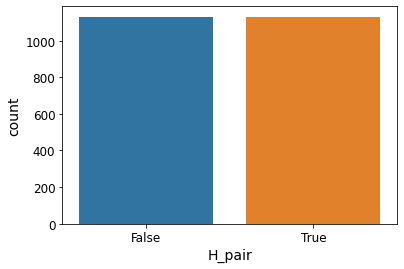

In [ ]:
df_x1 = df1.drop('H_pair',axis=1)
df_y1 = df1['H_pair']

#split the data into training and test data sets

train_x1, test_x1, train_y1, test_y1 = train_test_split(df_x1, df_y1, test_size=0.2, random_state=40,stratify=df_y1)
sns.countplot(df1['H_pair'])

##Train ML models on Optical data with s threshold of 5% of random data

###Decision Tree 5% of random data

In [ ]:
tree=DecisionTreeClassifier(random_state=40,max_depth=10,max_leaf_nodes=25)
#Train and predict dataset to get scores
tree.fit(train_x1,train_y1)
y_pred1 = tree.predict(test_x1)

print(round(accuracy_score(test_y1, y_pred1),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y1,y_pred1))
print(classification_report(test_y1,y_pred1))

0.9448
     Neg   Pos
Neg [[210  17]
 [  8 218]]
              precision    recall  f1-score   support

       False       0.96      0.93      0.94       227
        True       0.93      0.96      0.95       226

    accuracy                           0.94       453
   macro avg       0.95      0.94      0.94       453
weighted avg       0.95      0.94      0.94       453



Accuracy: 0.9448

              precision    recall  f1-score   support

       False       0.96      0.93      0.94       227
        True       0.93      0.96      0.95       226

    accuracy                           0.94       453
    macro avg       0.95      0.94      0.94       453
    weighted avg       0.95      0.94      0.94       453

    Predicted: Neg   Pos
    True Neg [ 210    17]
    True Pos [   8   218]


In [ ]:

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = ['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK'],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')

###Random Forest 5% of random data

In [ ]:
# define search space
space = dict(criterion = ['gini', 'entropy'],
         max_depth = randint(1, 100), 
         min_samples_split = randint(2, 15), 
         max_leaf_nodes = randint(5, 30))

# define DT classification model
model =RandomForestClassifier(random_state=40)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='recall', n_jobs=-1, cv=cv, random_state=1)

# execute search
result1 = search.fit(train_x1, train_y1)
forest_y_pred1=search.predict(test_x1)

In [ ]:
# summarize result
print('Best Score: %s' % result1.best_score_)
print('Best Hyperparameters: %s' % result1.best_params_)
print(round(accuracy_score(test_y1, y_pred1),4),'\n')
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y1,y_pred1))
print(classification_report(test_y1,y_pred1))

Best Score: 0.9624693906461861
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 26, 'min_samples_split': 6}
0.9448 

     Neg   Pos
Neg [[210  17]
 [  8 218]]
              precision    recall  f1-score   support

       False       0.96      0.93      0.94       227
        True       0.93      0.96      0.95       226

    accuracy                           0.94       453
   macro avg       0.95      0.94      0.94       453
weighted avg       0.95      0.94      0.94       453



Best Score: 0.9624693906461861
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 26, 'min_samples_split': 6}
0.9448 

              precision    recall  f1-score   support

       False       0.96      0.93      0.94       227
        True       0.93      0.96      0.95       226

    accuracy                           0.94       453
    macro avg       0.95      0.94      0.94       453
    weighted avg       0.95      0.94      0.94       453

    Predicted: Neg   Pos
    True Neg [ 210    17]
    True Pos [  8    218]

###LightGBM Predictor 5% of random data

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import r2_score
#train_x1, test_x1, train_y1, test_y1

lgb_train = lgb.Dataset(train_x1, train_y1)

lgb_eval = lgb.Dataset(test_x1, test_y1, reference=lgb_train)

params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 40,
    "learning_rate": 0.05,
    "feature_fraction": 0.85,
    "reg_lambda": 2,
    "metric": "rmse"
}


gbm = lgb.train(params,
                train_set=lgb_train,
               
                num_boost_round=300,
                valid_sets=lgb_eval,
                early_stopping_rounds=150
                )

lgbm_y_pred = gbm.predict(test_x1, num_iteration=gbm.best_iteration)

print('The rmse of prediction is:', mean_squared_error(test_y1, lgbm_y_pred)**0.5)

In [ ]:
print('The rmse of prediction is:', mean_squared_error(test_y1, lgbm_y_pred)**0.5)

The rmse of prediction is: 0.22638008895168069


(array([  6., 100.,  44.,  18.,  13.,   8.,   2.,   4.,   1.,   3.,   6.,
          1.,   2.,   1.,   1.,   1.,   2.,   1.,   3.,   1.,   2.,   0.,
          1.,   1.,   1.,   0.,   1.,   1.,   1.,   1.,   1.,   0.,   1.,
          2.,   0.,   2.,  10.,   7.,   6.,   5.,   3.,  11.,   7.,  20.,
         19.,  24.,  36.,  55.,  10.,   7.]),
 array([-0.03470561, -0.012773  ,  0.00915961,  0.03109222,  0.05302484,
         0.07495745,  0.09689006,  0.11882267,  0.14075528,  0.16268789,
         0.18462051,  0.20655312,  0.22848573,  0.25041834,  0.27235095,
         0.29428356,  0.31621618,  0.33814879,  0.3600814 ,  0.38201401,
         0.40394662,  0.42587924,  0.44781185,  0.46974446,  0.49167707,
         0.51360968,  0.53554229,  0.55747491,  0.57940752,  0.60134013,
         0.62327274,  0.64520535,  0.66713796,  0.68907058,  0.71100319,
         0.7329358 ,  0.75486841,  0.77680102,  0.79873363,  0.82066625,
         0.84259886,  0.86453147,  0.88646408,  0.90839669,  0.9303293 ,
 

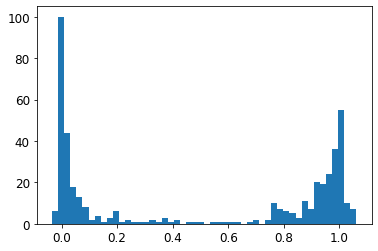

In [ ]:
predict = lgbm_y_pred
plt.hist(predict,bins=50)

###Neural networks 5% of random data

In [ ]:
features=['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK','H_pair']

In [ ]:
#train_x1, test_x1, train_y1, test_y1

model=keras.Sequential()

model.add(Dense(len(features[:-1]), kernel_initializer='normal',input_dim = train_x1.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(256, kernel_initializer='normal',activation='softmax'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')

callbacks_list = [checkpoint]

model.fit(train_x1, train_y1, epochs=2000, batch_size=512, validation_split = 0.2, callbacks=callbacks_list)

#Relu_history=NN_model.fit(train_x1,train_y1,epochs=60,validation_split=0.1,callbacks=[early_stopping_cb])
#history = model.fit(x_train1, y_train1, epochs = 30, validation_split=0.1)
model.evaluate(test_x1, test_y1)

# Evaluate on test data
print('\n---- Test data ----')
predictions = model.predict(test_x1)
accuracy = sklearn.metrics.accuracy_score(test_y1, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}%'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(test_y1, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(test_y1, np.argmax(predictions, axis=1)))


###NN 5% of random data

In [ ]:
features=['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK','H_pair']

In [ ]:
# define model #Reshape x input
model_nn = Sequential()
model_nn.add(Dense(len(features[:-1]), kernel_initializer='normal',input_dim = train_x1.shape[1], activation='relu'))
model_nn.add(Dense(100, input_dim=2, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
model_nn.add(Dense(100, input_dim=2, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
model_nn.add(Dense(300, input_dim=2, activation="relu"))   
model_nn.add(Dense(100,  input_dim=2,activation="relu"))
model_nn.add(Dense(1, activation='sigmoid'))
# compile model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
model_nn.fit(train_x1, train_y1, epochs=300, verbose=0)

In [ ]:
model_nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
_________________________________________________________________
dense_5 (Dense)              (None, 300)               600       
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [ ]:
model_nn.evaluate(test_x1, test_y1)

# Evaluate on test data
print('\n---- Test data ----')
predictions1 = model_nn.predict(test_x1)
accuracy1 = accuracy_score(test_y1, np.argmax(predictions1, axis=1))
print('Accuracy: {0:.2f}%'.format(accuracy1 * 100.0))
print('Classification Report:')
print(classification_report(test_y1, np.argmax(predictions1, axis=1)))
print('Confusion Matrix:')
print(confusion_matrix(test_y1, np.argmax(predictions1, axis=1)))


15/15 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5011

---- Test data ----
Accuracy: 50.11%
Classification Report:
              precision    recall  f1-score   support

       False       0.50      1.00      0.67       227
        True       0.00      0.00      0.00       226

    accuracy                           0.50       453
   macro avg       0.25      0.50      0.33       453
weighted avg       0.25      0.50      0.33       453

Confusion Matrix:
[[227   0]
 [226   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy: 50.11%
Classification Report:
              precision    recall  f1-score   support

       False       0.50      1.00      0.67       227
        True       0.00      0.00      0.00       226

    accuracy                           0.50       453
    macro avg       0.25      0.50      0.33       453
    weighted avg       0.25      0.50      0.33       453

    Confusion Matrix:
    Predicted:  Neg   Pos
    True Neg   [227     0]
    True Pos   [226     0]

In [ ]:
# fit model #train_x1, test_x1, train_y1, test_y1
history = model_nn.fit(train_x1, train_y1, validation_data=(test_x1, test_y1), epochs=300, verbose=0)
# evaluate the model
_, train_acc = model_nn.evaluate(train_x1, train_y1, verbose=0)
_, test_acc = model_nn.evaluate(test_x1, test_y1, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.500, Test: 0.501


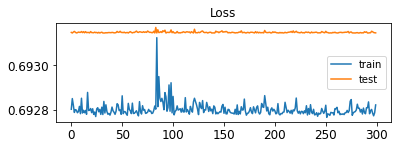

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

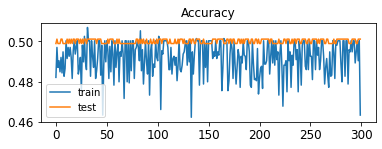

In [ ]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

###Auto Machine Learning 5% of random data
https://pypi.org/project/mljar-supervised/

In [ ]:
#!pip install mljar-supervised

In [ ]:
#pip install delayed

In [ ]:
from supervised.automl import AutoML

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [ ]:
automl = AutoML(explain_level=2, eval_metric = 'average_precision')
automl.fit(train_x1, train_y1)

predictions = automl.predict(test_x1)

1_Baseline average_precision 0.501104 trained in 0.61 seconds <br>
2_DecisionTree average_precision 0.915976 trained in 15.9 seconds <br>
3_Linear average_precision 0.963813 trained in 4.4 seconds <br>
4_Default_Xgboost average_precision 0.965797 trained in 6.79 seconds <br>
5_Default_NeuralNetwork average_precision 0.974079 trained in 2.16 seconds <br>
6_Default_RandomForest average_precision 0.959722 trained in 8.63 seconds <br>

In [ ]:
print(predictions)
print("Test accuracy:", accuracy_score(test_y1, predictions))

In [ ]:
print('   Neg',' Pos','\n',confusion_matrix(test_y1,predictions) )
print(classification_report(test_y1,predictions))

   Neg  Pos 
 [[209  18]
 [  7 219]]
              precision    recall  f1-score   support

       False       0.97      0.92      0.94       227
        True       0.92      0.97      0.95       226

    accuracy                           0.94       453
   macro avg       0.95      0.94      0.94       453
weighted avg       0.95      0.94      0.94       453



              precision    recall  f1-score   support

       False       0.97      0.92      0.94       227
        True       0.92      0.97      0.95       226

    accuracy                           0.94       453
    macro avg       0.95      0.94      0.94       453
    weighted avg       0.95      0.94      0.94       453

    Predicted     Neg     Pos 
    True Neg    [ 209      18 ]
    True Pos    [  7      219 ]

###AutoML Explain 5% of random data

AutoML directory: AutoML_6
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Xgboost']
AutoML will ensemble availabe models


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



AutoML steps: ['simple_algorithms', 'default_algorithms', 'golden_features', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 1 model


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



1_Default_Xgboost logloss 0.183998 trained in 17.73 seconds
Skip golden_features because no parameters were generated.
* Step ensemble will try to check up to 1 model
AutoML fit time: 23.79 seconds
AutoML best model: 1_Default_Xgboost


AutoML(algorithms=['Xgboost'], explain_level=2, golden_features=True,
       total_time_limit=30,
       validation_strategy={'k_folds': 3, 'shuffle': False, 'stratify': True,
                            'validation_type': 'kfold'})

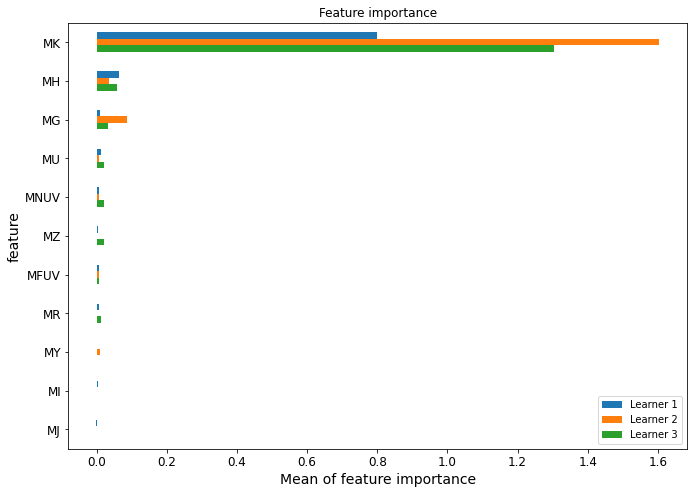

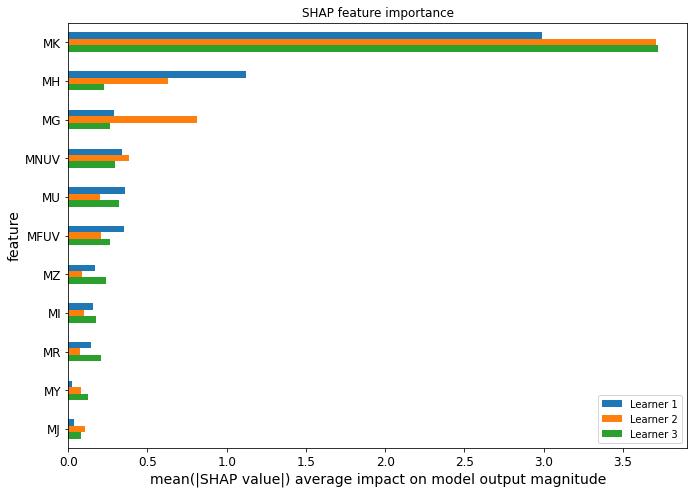

In [ ]:
a = AutoML(algorithms=['Xgboost'],total_time_limit=30,
           explain_level=2,golden_features=True,
           validation_strategy={
            "validation_type": "kfold",
            "k_folds": 3,
            "shuffle": False,
            "stratify": True,
            })
a.fit(train_x1,train_y1)

Available Algorithms ['Random Forest', 'Xgboost', 'Decision Tree', 'Baseline', 'LightGBM', 'Extra Trees', 'CatBoost', 'Linear', 'Neural Network', 'Nearest Neighbors']

AutoML directory: AutoML_7
The task is binary_classification with evaluation metric average_precision
AutoML will use algorithms: ['Neural Network']
AutoML will ensemble availabe models


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



AutoML steps: ['simple_algorithms', 'default_algorithms', 'golden_features', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 1 model
1_Default_NeuralNetwork average_precision 0.964004 trained in 5.67 seconds
Skip golden_features because no parameters were generated.
* Step ensemble will try to check up to 1 model
AutoML fit time: 11.18 seconds
AutoML best model: 1_Default_NeuralNetwork


AutoML(algorithms=['Neural Network'], eval_metric='average_precision',
       explain_level=2, golden_features=True, total_time_limit=30,
       validation_strategy={'k_folds': 3, 'shuffle': False, 'stratify': True,
                            'validation_type': 'kfold'})

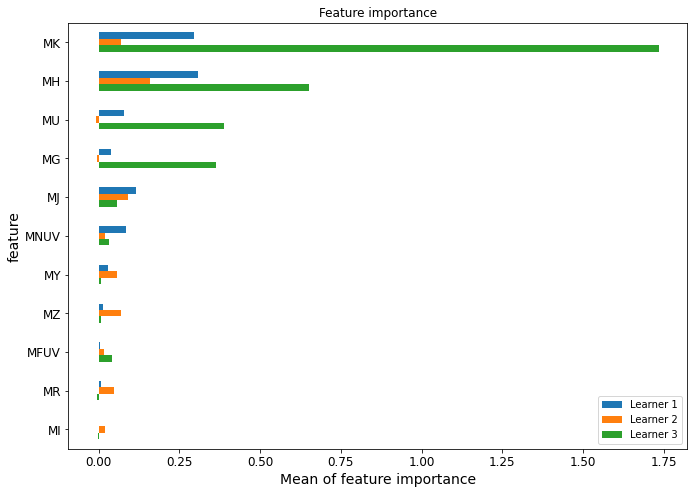

In [ ]:
b = AutoML(algorithms=['Neural Network'],
           total_time_limit=30,
           explain_level=2,golden_features=True,
           eval_metric = 'average_precision',
           validation_strategy={
            "validation_type": "kfold",
            "k_folds": 3,
            "shuffle": False,
            "stratify": True,
            })
b.fit(train_x1,train_y1)

#Finding counterparts for Optical data at s threshold of 10% of random data (Oisín)

###Optical Dataset 10%
Cosmos dataset matched with VLA Radio data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# HOR (Herschel Optical Radio Counterparts)
from astropy.table import Table #to read the .FITS file

hor_5 = Table.read(f'/content/drive/MyDrive/Herschel/all_opitical_matched_to_5_percent_radio.fits', format='fits').to_pandas()
hor_5.drop('col1',axis=1,inplace=True) #remove null columns
hor_5 = hor_5.rename(columns={'F_BLIND_MF_SPIRE_250': 'H_250_flux','F_BLIND_MF_SPIRE_350': 'H_350_flux','F_BLIND_MF_SPIRE_500': 'H_500_flux','flux_match':'Radio_flux'})
hor_5[100:102] #216 matches #contains NANs for Optical Data

Id       alpha    delta  zBEST  type    zPDF  zPDF_l68  zPDF_u68  zMinChi2  chi2_best       zp_2        chi2_2  NbFilt    zq      chiq     modq   mods       chis  maskUVISTA  maskHSC  maskSCAM  mask  model           age  extinction       MFUV       MNUV         MU         MG        MR         MI        MZ         MY         MJ         MH         MK  mass_med  mass_med_min68  mass_med_max68  mass_best  SFR_med  SFR_med_min68  SFR_med_max68  SFR_best  sSFR_med  sSFR_med_min68  sSFR_med_max68  sSFR_best   L_nu    L_r    L_k  Herschel_RA  Herschel_Dec  H_250_flux  FErr_BLIND_MF_SPIRE_250  H_350_flux  FErr_BLIND_MF_SPIRE_350  H_500_flux  FErr_BLIND_MF_SPIRE_500   r   P  RA_pix  Dec_pix  F_BLIND_pix_SPIRE_250  FErr_BLIND_pix_SPIRE_250  ID_match Project_match Time_match  RA  RA_ERR_match  DEC  DEC_ERR_match  Radio_flux  flux_err_match  RMS_match  SNR_match  NPIX_match  RES_match  Multi_match  GroupID_2  GroupSize_2  Separation_2   s  s_norm  GroupID  GroupSize  Separation
100  96.0  151.048569  1.39154  -99.0   0.0  1.6299    0.3901    2.1224   0.44639   0.073839   1.640000  2.992727e-01     6.0  1.19  0.270166  10027.0 -220.0   1.721648         1.0      0.0       1.0   1.0   11.0  5.000000e+07         0.3 -17.778521 -17.932961 -18.913280 -19.207939 -19.61754 -19.382971 -19.60166 -19.754459 -19.872160 -20.091440 -19.944010   9.07747         8.64546         9.50713    8.43983  0.52346        0.24460        0.88962    1.0980  -8.52515        -9.05925        -8.00412     -7.342  9.767  9.084  8.162          NaN           NaN         NaN                      NaN         NaN                      NaN         NaN                      NaN NaN NaN     NaN      NaN                    NaN                       NaN       NaN           NaN        NaN NaN           NaN  NaN            NaN         NaN             NaN        NaN        NaN         NaN        NaN          NaN       <NA>         <NA>           NaN NaN     NaN     <NA>       <NA>         NaN
101  97.0  151.028366  1.39154  -99.0   0.0  1.5375    1.4595    1.6285   1.52900   1.531507 -99.900002  2.500000e+08     7.0  1.59  0.971187  10001.0 -220.0  12.432300         1.0      0.0       1.0   1.0    2.0  1.139000e+09         0.0 -17.775530 -18.049000 -18.582279 -19.824850 -20.11932 -20.241791 -20.36006 -20.447670 -20.471569 -20.581841 -20.354549   9.31176         9.07253         9.49228    9.45579  0.40901        0.14834        0.76776   -0.4537  -8.89349        -9.29045        -8.33490     -9.909  8.572  9.008  8.281          NaN           NaN         NaN                      NaN         NaN                      NaN         NaN                      NaN NaN NaN     NaN      NaN                    NaN                       NaN       NaN           NaN        NaN NaN           NaN  NaN            NaN         NaN             NaN        NaN        NaN         NaN        NaN          NaN       <NA>         <NA>           NaN NaN     NaN     <NA>       <NA>         NaN

In [ ]:
hor_5.count()


*   Identify which optical sources have radio counterparts
*   Create new column displaying 'True' if there is a radio counterpart and 'False' if there is no counterpart.
*   Remove infinite values.
*   Drop radio fluxes.  

In [ ]:
hor_5_SED = hor_5[['Radio_flux','MFUV', 'MNUV', 'MU', 'MG', 'MR', 'MI', 'MZ', 'MY', 'MJ', 'MH', 'MK']] #Select features
hor_5_SED['Radio_flux'].fillna(0,inplace=True)
hor_5_SED['H_pair'] = np.where(hor_5_SED['Radio_flux']!= 0, True, False)
hor_5_SED  = hor_5_SED.replace([999, -999], np.nan).dropna()
hor_5_SED = hor_5_SED.drop('Radio_flux', 1)
print(hor_5_SED.isnull().values.any())
hor_5_SED[4:7]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



MFUV       MNUV         MU         MG         MR         MI         MZ         MY         MJ         MH        MK  H_pair
4 -18.53801 -20.094040 -22.141260 -22.906940 -23.807470 -23.910910 -24.290489 -24.561300 -24.926250 -25.279510 -25.25148    True
5 -15.83110 -16.443140 -20.065941 -21.858330 -22.565109 -23.097481 -23.337879 -23.589661 -23.696131 -23.925930 -23.69519   False
7 -21.16188 -21.320669 -21.646891 -21.996099 -22.271080 -22.174040 -22.249950 -22.280790 -22.238590 -22.276461 -21.53830   False

##ML Preprocessing 10%

In [ ]:
dftrue = hor_5_SED[hor_5_SED['H_pair'] == True]
dffalse = hor_5_SED[hor_5_SED['H_pair'] == False]
dftrue['H_pair'].count(),dffalse['H_pair'].count()

(1132, 1704274)

1505 samples of 1132 go into 1704274
<br> create false dataset of length 1132

In [ ]:
dffalse1 = dffalse[:1132]
frames = [dftrue, dffalse1]
df1 = pd.concat(frames)
df1[1130:1134]

MFUV       MNUV         MU         MG         MR         MI         MZ         MY         MJ         MH         MK  H_pair
1720698 -19.107229 -19.552401 -21.038019 -22.195530 -22.838530 -23.211510 -23.524099 -23.673290 -23.919460 -24.103331 -24.168819    True
1720699 -19.804171 -20.712200 -21.777840 -22.847950 -23.246840 -22.842369 -23.064951 -23.229700 -24.154800 -24.355530 -24.174070    True
5       -15.831100 -16.443140 -20.065941 -21.858330 -22.565109 -23.097481 -23.337879 -23.589661 -23.696131 -23.925930 -23.695190   False
7       -21.161880 -21.320669 -21.646891 -21.996099 -22.271080 -22.174040 -22.249950 -22.280790 -22.238590 -22.276461 -21.538300   False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



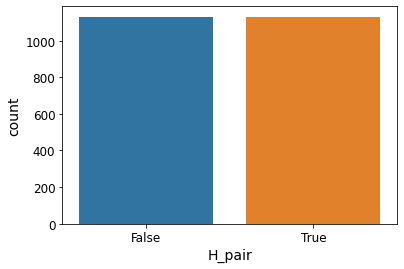

In [ ]:
df_x1 = df1.drop('H_pair',axis=1)
df_y1 = df1['H_pair']

#split the data into training and test data sets

train_x1, test_x1, train_y1, test_y1 = train_test_split(df_x1, df_y1, test_size=0.2, random_state=40,stratify=df_y1)
sns.countplot(df1['H_pair'])

##Train ML models 10%

###Decision Tree 10%

In [ ]:
tree=DecisionTreeClassifier(random_state=40,max_depth=10,max_leaf_nodes=25)
#Train and predict dataset to get scores
tree.fit(train_x1,train_y1)
y_pred1 = tree.predict(test_x1)

print(round(accuracy_score(test_y1, y_pred1),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y1,y_pred1))
print(classification_report(test_y1,y_pred1))

Accuracy: 0.9448

              precision    recall  f1-score   support

       False       0.96      0.93      0.94       227
        True       0.93      0.96      0.95       226

    accuracy                           0.94       453
    macro avg      0.95      0.94      0.94       453
    weighted avg   0.95      0.94      0.94       453

    Predicted    Neg    Pos
    True Neg   [ 210     17 ] 
    True Pos   [   8    218 ]

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = ['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK'],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
from IPython.display import Image
Image(filename = 'tree.png')

###Random Forest 10%

In [ ]:
# define search space
space = dict(criterion = ['gini', 'entropy'],
         max_depth = randint(1, 100), 
         min_samples_split = randint(2, 15), 
         max_leaf_nodes = randint(5, 30))

# define DT classification model
model =RandomForestClassifier(random_state=40)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='recall', n_jobs=-1, cv=cv, random_state=1)

# execute search
result1 = search.fit(train_x1, train_y1)
forest_y_pred1=search.predict(test_x1)

In [ ]:
# summarize result
print('Best Score: %s' % result1.best_score_)
print('Best Hyperparameters: %s' % result1.best_params_)
print(round(accuracy_score(test_y1, y_pred1),4),'\n')
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y1,y_pred1))
print(classification_report(test_y1,y_pred1))

###LightGBM Predictor 10%

In [ ]:
#train_x1, test_x1, train_y1, test_y1

lgb_train = lgb.Dataset(train_x1, train_y1)

lgb_eval = lgb.Dataset(test_x1, test_y1, reference=lgb_train)

params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 40,
    "learning_rate": 0.05,
    "feature_fraction": 0.85,
    "reg_lambda": 2,
    "metric": "rmse"
}


gbm = lgb.train(params,
                train_set=lgb_train,
               
                num_boost_round=300,
                valid_sets=lgb_eval,
                early_stopping_rounds=150
                )

lgbm_y_pred = gbm.predict(test_x1, num_iteration=gbm.best_iteration)

print('The rmse of prediction is:', mean_squared_error(test_y1, lgbm_y_pred)**0.5)

In [ ]:
print('The rmse of prediction is:', mean_squared_error(test_y1, lgbm_y_pred)**0.5)

The rmse of prediction is: 0.22638008895168069


(array([  6., 100.,  44.,  18.,  13.,   8.,   2.,   4.,   1.,   3.,   6.,
          1.,   2.,   1.,   1.,   1.,   2.,   1.,   3.,   1.,   2.,   0.,
          1.,   1.,   1.,   0.,   1.,   1.,   1.,   1.,   1.,   0.,   1.,
          2.,   0.,   2.,  10.,   7.,   6.,   5.,   3.,  11.,   7.,  20.,
         19.,  24.,  36.,  55.,  10.,   7.]),
 array([-0.03470561, -0.012773  ,  0.00915961,  0.03109222,  0.05302484,
         0.07495745,  0.09689006,  0.11882267,  0.14075528,  0.16268789,
         0.18462051,  0.20655312,  0.22848573,  0.25041834,  0.27235095,
         0.29428356,  0.31621618,  0.33814879,  0.3600814 ,  0.38201401,
         0.40394662,  0.42587924,  0.44781185,  0.46974446,  0.49167707,
         0.51360968,  0.53554229,  0.55747491,  0.57940752,  0.60134013,
         0.62327274,  0.64520535,  0.66713796,  0.68907058,  0.71100319,
         0.7329358 ,  0.75486841,  0.77680102,  0.79873363,  0.82066625,
         0.84259886,  0.86453147,  0.88646408,  0.90839669,  0.9303293 ,
 

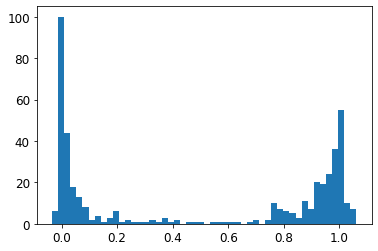

In [ ]:
predict = lgbm_y_pred
plt.hist(predict,bins=50)

###Neural networks 10%

In [ ]:
features=['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK','H_pair']

In [ ]:
#train_x1, test_x1, train_y1, test_y1

model=keras.Sequential()

model.add(Dense(len(features[:-1]), kernel_initializer='normal',input_dim = train_x1.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(256, kernel_initializer='normal',activation='softmax'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')

callbacks_list = [checkpoint]

model.fit(train_x1, train_y1, epochs=2000, batch_size=512, validation_split = 0.2, callbacks=callbacks_list)

#Relu_history=NN_model.fit(train_x1,train_y1,epochs=60,validation_split=0.1,callbacks=[early_stopping_cb])
#history = model.fit(x_train1, y_train1, epochs = 30, validation_split=0.1)
model.evaluate(test_x1, test_y1)

# Evaluate on test data
print('\n---- Test data ----')
predictions = model.predict(test_x1)
accuracy = sklearn.metrics.accuracy_score(test_y1, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}%'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(test_y1, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(test_y1, np.argmax(predictions, axis=1)))


Accuracy: 50.11%
Classification Report:
              precision    recall  f1-score   support

       False       0.50      1.00      0.67       227
        True       0.00      0.00      0.00       226

    accuracy                           0.50       453
    macro avg       0.25      0.50      0.33       453
    weighted avg       0.25      0.50      0.33       453
    Confusion Matrix:
    Predicted    Neg    Pos
    True Neg   [ 227      0 ]
    True Pos   [ 226      0 ]

###NN  10%

In [ ]:
features=['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK','H_pair']

In [ ]:
# define model #Reshape x input
model_nn = Sequential()
model_nn.add(Dense(len(features[:-1]), kernel_initializer='normal',input_dim = train_x1.shape[1], activation='relu'))
model_nn.add(Dense(100, input_dim=2, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
model_nn.add(Dense(100, input_dim=2, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
model_nn.add(Dense(300, input_dim=2, activation="relu"))   
model_nn.add(Dense(100,  input_dim=2,activation="relu"))
model_nn.add(Dense(1, activation='sigmoid'))
# compile model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
model_nn.fit(train_x1, train_y1, epochs=300, verbose=0)

In [ ]:
model_nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_19 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
_________________________________________________________________
dense_21 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 101       
_________________________________________________________________
dense_23 (Dense)             (None, 300)               600       
_________________________________________________________________
dense_24 (Dense)             (None, 100)              

In [ ]:
model_nn.evaluate(test_x1, test_y1)

# Evaluate on test data
print('\n---- Test data ----')
predictions1 = model_nn.predict(test_x1)
accuracy1 = accuracy_score(test_y1, np.argmax(predictions1, axis=1))
print('Accuracy: {0:.2f}%'.format(accuracy1 * 100.0))
print('Classification Report:')
print(classification_report(test_y1, np.argmax(predictions1, axis=1)))
print('Confusion Matrix:')
print(confusion_matrix(test_y1, np.argmax(predictions1, axis=1)))


Accuracy: 50.11%
Classification Report:
              precision    recall  f1-score   support

       False       0.50      1.00      0.67       227
        True       0.00      0.00      0.00       226

    accuracy                           0.50       453
    macro avg       0.25      0.50      0.33       453
    weighted avg       0.25      0.50      0.33       453
    Confusion Matrix:
    Predicted    Neg    Pos
    True Neg   [ 227      0 ]
    True Pos   [ 226      0 ]

In [ ]:
# fit model #train_x1, test_x1, train_y1, test_y1
history = model_nn.fit(train_x1, train_y1, validation_data=(test_x1, test_y1), epochs=300, verbose=0)
# evaluate the model
_, train_acc = model_nn.evaluate(train_x1, train_y1, verbose=0)
_, test_acc = model_nn.evaluate(test_x1, test_y1, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.946, Test: 0.945


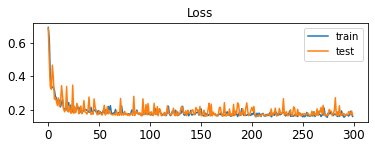

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

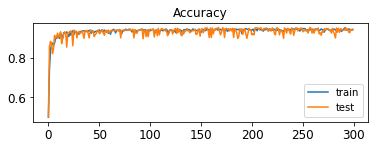

In [ ]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

###Auto Machine Learning 10%
https://pypi.org/project/mljar-supervised/

In [ ]:
#!pip install mljar-supervised

In [ ]:
#pip install delayed

In [ ]:
from supervised.automl import AutoML

In [ ]:
automl = AutoML(explain_level=2, eval_metric = 'average_precision')
automl.fit(train_x1, train_y1)

predictions = automl.predict(test_x1)

In [ ]:
print(predictions)
print("Test accuracy:", accuracy_score(test_y1, predictions))

[0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1
 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1
 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0
 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1
 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 1 0 0 0 1 0]
Test accuracy: 0.9448123620309051


In [ ]:
print('   Neg',' Pos','\n',confusion_matrix(test_y1,predictions) )
print(classification_report(test_y1,predictions))

   Neg  Pos 
 [[209  18]
 [  7 219]]
              precision    recall  f1-score   support

       False       0.97      0.92      0.94       227
        True       0.92      0.97      0.95       226

    accuracy                           0.94       453
   macro avg       0.95      0.94      0.94       453
weighted avg       0.95      0.94      0.94       453



###AutoML Explain 2 10%

AutoML directory: AutoML_9
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Xgboost']
AutoML will ensemble availabe models


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



AutoML steps: ['simple_algorithms', 'default_algorithms', 'golden_features', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 1 model


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



1_Default_Xgboost logloss 0.183998 trained in 18.19 seconds
Skip golden_features because no parameters were generated.
* Step ensemble will try to check up to 1 model
AutoML fit time: 24.29 seconds
AutoML best model: 1_Default_Xgboost


AutoML(algorithms=['Xgboost'], explain_level=2, golden_features=True,
       total_time_limit=30,
       validation_strategy={'k_folds': 3, 'shuffle': False, 'stratify': True,
                            'validation_type': 'kfold'})

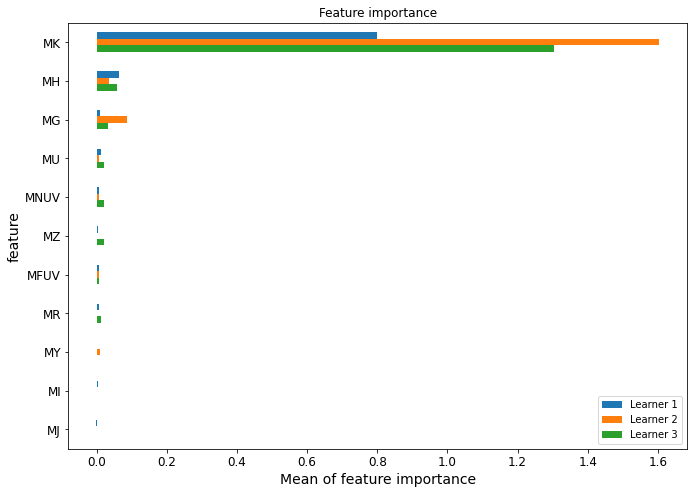

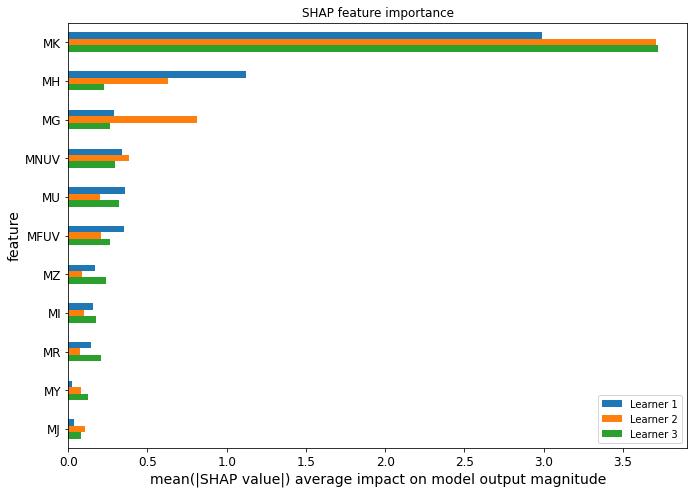

In [ ]:
a = AutoML(algorithms=['Xgboost'],total_time_limit=30,
           explain_level=2,golden_features=True,
           validation_strategy={
            "validation_type": "kfold",
            "k_folds": 3,
            "shuffle": False,
            "stratify": True,
            })
a.fit(train_x1,train_y1)

Available Algorithms ['Random Forest', 'Xgboost', 'Decision Tree', 'Baseline', 'LightGBM', 'Extra Trees', 'CatBoost', 'Linear', 'Neural Network', 'Nearest Neighbors']

AutoML directory: AutoML_10
The task is binary_classification with evaluation metric average_precision
AutoML will use algorithms: ['Neural Network']
AutoML will ensemble availabe models


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



AutoML steps: ['simple_algorithms', 'default_algorithms', 'golden_features', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 1 model
1_Default_NeuralNetwork average_precision 0.964004 trained in 5.87 seconds
Skip golden_features because no parameters were generated.
* Step ensemble will try to check up to 1 model
AutoML fit time: 11.43 seconds
AutoML best model: 1_Default_NeuralNetwork


AutoML(algorithms=['Neural Network'], eval_metric='average_precision',
       explain_level=2, golden_features=True, total_time_limit=30,
       validation_strategy={'k_folds': 3, 'shuffle': False, 'stratify': True,
                            'validation_type': 'kfold'})

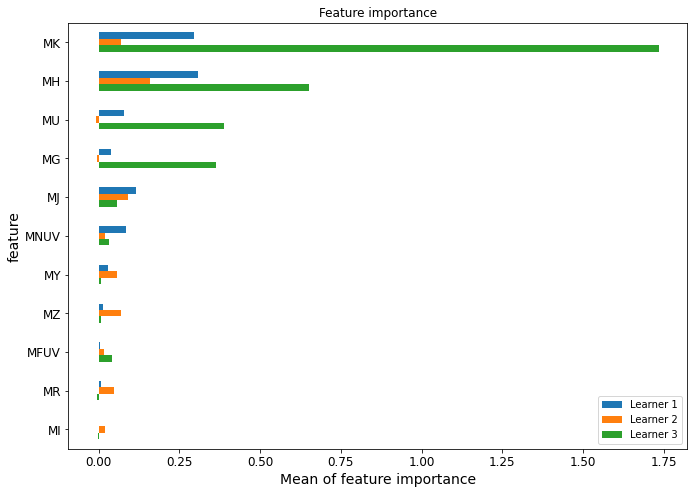

In [ ]:
b = AutoML(algorithms=['Neural Network'],
           total_time_limit=30,
           explain_level=2,golden_features=True,
           eval_metric = 'average_precision',
           validation_strategy={
            "validation_type": "kfold",
            "k_folds": 3,
            "shuffle": False,
            "stratify": True,
            })
b.fit(train_x1,train_y1)

#Finding counterparts for Optical data at s threshold of 95% purity (Oisín)

###Optical Dataset 95% purity
Cosmos dataset matched with VLA Radio data 

In [ ]:
from google.colab import drive
import os  
#mounts the google drive to save time
drive.mount('/content/drive')
#changes to the needed directory

#Oisin's Drive
os.chdir('/content/drive/MyDrive/Herschel/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# HOR (Herschel Optical Radio Counterparts)
from astropy.table import Table #to read the .FITS file

df_95_purity = Table.read(f'all_opitical_matched_to_95_purity_radio.fits', format='fits').to_pandas()
df_95_purity.drop('col1',axis=1,inplace=True) #remove null columns
df_95_purity = df_95_purity.rename(columns={'F_BLIND_MF_SPIRE_250': 'H_250_flux','F_BLIND_MF_SPIRE_350': 'H_350_flux','F_BLIND_MF_SPIRE_500': 'H_500_flux','flux_match':'Radio_flux'})
df_95_purity[100:102] #216 matches #contains NANs for Optical Data

Id       alpha    delta  zBEST  type    zPDF  zPDF_l68  zPDF_u68  zMinChi2  chi2_best  zp_2    chi2_2  NbFilt    zq      chiq     modq   mods      chis  maskUVISTA  maskHSC  maskSCAM  mask  model           age  extinction       MFUV       MNUV         MU        MG         MR        MI         MZ         MY         MJ        MH         MK  mass_med  mass_med_min68  mass_med_max68  mass_best  SFR_med  SFR_med_min68  SFR_med_max68  SFR_best  sSFR_med  sSFR_med_min68  sSFR_med_max68  sSFR_best   L_nu    L_r    L_k  Herschel_RA  Herschel_Dec  H_250_flux  FErr_BLIND_MF_SPIRE_250  H_350_flux  FErr_BLIND_MF_SPIRE_350  H_500_flux  FErr_BLIND_MF_SPIRE_500   r   P  RA_pix  Dec_pix  F_BLIND_pix_SPIRE_250  FErr_BLIND_pix_SPIRE_250  ID_match Project_match Time_match  RA  RA_ERR_match  DEC  DEC_ERR_match  Radio_flux  flux_err_match  RMS_match  SNR_match  NPIX_match  RES_match  Multi_match  GroupID_2  GroupSize_2  Separation_2   s  s_norm  GroupID  GroupSize  Separation
100  81.0  149.721466  1.39166  -99.0   0.0  1.5883    0.8866     1.925   0.72543   0.209956  1.14  0.383240     8.0  0.21  0.413556  10028.0  -15.0  0.916272         1.0      0.0       1.0   1.0   10.0  3.500000e+09         0.0 -17.662951 -17.503941 -17.860069 -18.43190 -18.583639 -18.65156 -18.742430 -18.785521 -18.771040 -18.85288 -18.583429   8.30829         7.83607         8.79014    8.74045 -0.14592       -0.44439        0.06114   -0.4673  -8.47607        -9.02946        -7.95898     -9.208  8.445  8.398  7.566          NaN           NaN         NaN                      NaN         NaN                      NaN         NaN                      NaN NaN NaN     NaN      NaN                    NaN                       NaN       NaN           NaN        NaN NaN           NaN  NaN            NaN         NaN             NaN        NaN        NaN         NaN        NaN          NaN       <NA>         <NA>           NaN NaN     NaN     <NA>       <NA>         NaN
101  82.0  149.690521  1.39165  -99.0   0.0  2.6859    2.2457     2.877   2.73730   0.395045  0.09  0.926403     9.0  2.47  0.446272  10029.0 -533.0  1.408186         1.0      0.0       1.0   1.0   12.0  3.602000e+08         0.1 -19.287201 -19.542660 -19.956381 -20.20985 -20.367399 -20.24305 -20.368111 -20.457861 -20.455521 -20.57226 -20.339319   9.04293         8.72698         9.31170    8.95810  0.74662        0.39324        0.87084    0.8164  -8.31667        -8.71769        -7.91435     -8.142  9.642  9.177  8.288          NaN           NaN         NaN                      NaN         NaN                      NaN         NaN                      NaN NaN NaN     NaN      NaN                    NaN                       NaN       NaN           NaN        NaN NaN           NaN  NaN            NaN         NaN             NaN        NaN        NaN         NaN        NaN          NaN       <NA>         <NA>           NaN NaN     NaN     <NA>       <NA>         NaN

In [ ]:
df_95_purity_SED = df_95_purity[['Radio_flux','MFUV', 'MNUV', 'MU', 'MG', 'MR', 'MI', 'MZ', 'MY', 'MJ', 'MH', 'MK']] #Select features
df_95_purity_SED['Radio_flux'].fillna(0,inplace=True)
df_95_purity_SED['Counterpart'] = np.where(df_95_purity_SED['Radio_flux']!= 0, True, False)
df_95_purity_SED  = df_95_purity_SED.replace([999, -999], np.nan).dropna()
df_95_purity_SED = df_95_purity_SED.drop('Radio_flux', 1)
print(df_95_purity_SED.isnull().values.any())
df_95_purity_SED[4:7]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



MFUV       MNUV         MU         MG         MR         MI         MZ         MY         MJ         MH         MK  Counterpart
4 -18.738230 -19.602909 -21.118999 -22.096960 -22.715160 -22.999081 -23.267420 -23.478310 -23.666531 -24.069880 -24.015751         True
5 -18.855619 -19.374491 -20.540400 -21.686781 -22.461981 -22.732920 -23.055429 -23.246580 -23.475000 -23.880440 -23.743040         True
6 -17.008051 -17.117910 -18.747009 -19.923010 -20.774540 -21.261049 -21.695190 -22.011061 -22.445950 -22.881559 -22.859810         True

##ML Preprocessing for threshold at 95% purity

In [ ]:
dftrue = df_95_purity_SED[df_95_purity_SED['Counterpart'] == True]
dffalse = df_95_purity_SED[df_95_purity_SED['Counterpart'] == False]
dftrue['Counterpart'].count(),dffalse['Counterpart'].count()

(3318, 1702100)

1505 samples of 1132 go into 1704274
<br> create false dataset of length 1132

In [ ]:
dffalse1 = dffalse.sample(n = 3318, replace = False,random_state = 42)
frames = [dftrue, dffalse1]
df1 = pd.concat(frames)
df1[3316:3319]

MFUV       MNUV         MU         MG         MR         MI         MZ         MY         MJ         MH         MK  Counterpart
1720711 -15.591480 -17.124430 -18.727249 -20.426571 -21.311859 -21.961121 -22.357599 -22.586210 -22.790560 -23.095739 -22.941219         True
1720712 -19.107229 -19.552401 -21.038019 -22.195530 -22.838530 -23.211510 -23.524099 -23.673290 -23.919460 -24.103331 -24.168819         True
592916  -14.882710 -15.619190 -16.060671 -16.335739 -16.572519 -16.676310 -17.030920 -17.164841 -17.096781 -17.549709 -17.344709        False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



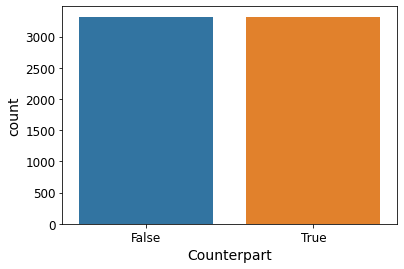

In [ ]:
df_x1 = df1.drop('Counterpart',axis=1)
df_y1 = df1['Counterpart']

#split the data into training and test data sets

train_x1, test_x1, train_y1, test_y1 = train_test_split(df_x1, df_y1, test_size=0.2, random_state=40,stratify=df_y1)
sns.countplot(df1['Counterpart'])

##Train ML models for data at 95% purity

###Decision Tree for data at s threshold of 95% purity

In [ ]:
tree=DecisionTreeClassifier(random_state=40,max_depth=10,max_leaf_nodes=25)
#Train and predict dataset to get scores
tree.fit(train_x1,train_y1)
y_pred1 = tree.predict(test_x1)

print('Accuracy score of :',round(accuracy_score(test_y1, y_pred1),4))
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y1,y_pred1))
print(classification_report(test_y1,y_pred1))

Accuracy score of : 0.9435
     Neg   Pos
Neg [[613  51]
 [ 24 640]]
              precision    recall  f1-score   support

       False       0.96      0.92      0.94       664
        True       0.93      0.96      0.94       664

    accuracy                           0.94      1328
   macro avg       0.94      0.94      0.94      1328
weighted avg       0.94      0.94      0.94      1328



Accuracy score of : 0.9435

              precision    recall  f1-score   support

       False       0.96      0.92      0.94       664
        True       0.93      0.96      0.94       664

    accuracy                           0.94      1328
    macro avg       0.94      0.94      0.94      1328
    weighted avg       0.94      0.94      0.94      1328

    Predicted    Neg     Pos
    True Neg   [ 613      51 ]
    True Pos   [ 24      640 ]

In [ ]:

# Export as dot file
export_graphviz(tree, out_file='tree.dot', 
                feature_names = ['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK'],
                class_names = ['No Counterpart','True Counterpart'],
                rounded = True, proportion = False, 
                precision = int(2), filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the tree
Image(filename = 'tree.png')

###Random Forest for data at "s" threshold of 95% purity

In [ ]:
# define search space
space = dict(criterion = ['gini', 'entropy'],
         max_depth = randint(1, 100), 
         min_samples_split = randint(2, 15), 
         max_leaf_nodes = randint(5, 30))

# define DT classification model
model =RandomForestClassifier(random_state=40)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='recall', n_jobs=-1, cv=cv, random_state=1)

# execute search
result1 = search.fit(train_x1, train_y1)
forest_y_pred1=search.predict(test_x1)

In [ ]:
# summarize result
print('Best Score: %s' % result1.best_score_)
print('Best Hyperparameters: %s' % result1.best_params_)
print(round(accuracy_score(test_y1, y_pred1),4),'\n')
print('     Neg   Pos')
print('Neg',confusion_matrix(test_y1,y_pred1))
print(classification_report(test_y1,y_pred1))

###LightGBM for data at "s" threshold of 95% purity

In [ ]:
#train_x1, test_x1, train_y1, test_y1

lgb_train = lgb.Dataset(train_x1, train_y1)

lgb_eval = lgb.Dataset(test_x1, test_y1, reference=lgb_train)

params = {
    "objective": "regression",
    "boosting": "gbdt",
    "num_leaves": 40,
    "learning_rate": 0.05,
    "feature_fraction": 0.85,
    "reg_lambda": 2,
    "metric": "rmse"
}


gbm = lgb.train(params,
                train_set=lgb_train,
               
                num_boost_round=300,
                valid_sets=lgb_eval,
                early_stopping_rounds=150
                )

lgbm_y_pred = gbm.predict(test_x1, num_iteration=gbm.best_iteration)

print('The rmse of prediction is:', mean_squared_error(test_y1, lgbm_y_pred)**0.5)

In [ ]:
print('The LGBM, rmse prediction is:', mean_squared_error(test_y1, lgbm_y_pred)**0.5)

The LGBM, rmse prediction is: 0.20109308520169197


(array([  1.,   1.,   2.,  11.,  39., 380.,  80.,  34.,  20.,  10.,   9.,
         10.,   7.,   2.,   5.,   6.,   0.,   1.,   5.,   4.,   2.,   2.,
          4.,   5.,   6.,   4.,   2.,   6.,   6.,   6.,   9.,   3.,  12.,
          5.,   9.,   8.,  13.,   9.,  26.,  42.,  45.,  59.,  79., 119.,
        130.,  60.,  21.,   7.,   0.,   2.]),
 array([-0.1398768 , -0.1140131 , -0.0881494 , -0.0622857 , -0.03642201,
        -0.01055831,  0.01530539,  0.04116909,  0.06703279,  0.09289648,
         0.11876018,  0.14462388,  0.17048758,  0.19635128,  0.22221497,
         0.24807867,  0.27394237,  0.29980607,  0.32566977,  0.35153346,
         0.37739716,  0.40326086,  0.42912456,  0.45498825,  0.48085195,
         0.50671565,  0.53257935,  0.55844305,  0.58430674,  0.61017044,
         0.63603414,  0.66189784,  0.68776154,  0.71362523,  0.73948893,
         0.76535263,  0.79121633,  0.81708003,  0.84294372,  0.86880742,
         0.89467112,  0.92053482,  0.94639852,  0.97226221,  0.99812591,
 

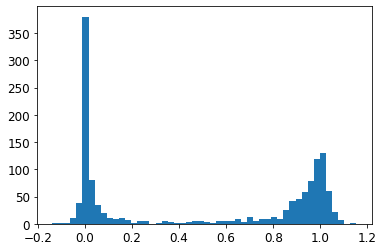

In [ ]:
predict = lgbm_y_pred
plt.hist(predict,bins=50)

###Neural networks for data at "s" threshold of 95% purity

In [ ]:
features=['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK','H_pair']

In [ ]:
#train_x1, test_x1, train_y1, test_y1

model=keras.Sequential()

model.add(Dense(len(features[:-1]), kernel_initializer='normal',input_dim = train_x1.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(128, kernel_initializer='normal',activation='relu'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(256, kernel_initializer='normal',activation='softmax'))
model.add(Dropout(rate=0.5, noise_shape=None, seed=None))
model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')

callbacks_list = [checkpoint]

model.fit(train_x1, train_y1, epochs=2000, batch_size=512, validation_split = 0.2, callbacks=callbacks_list)

#Relu_history=NN_model.fit(train_x1,train_y1,epochs=60,validation_split=0.1,callbacks=[early_stopping_cb])
#history = model.fit(x_train1, y_train1, epochs = 30, validation_split=0.1)
model.evaluate(test_x1, test_y1)

# Evaluate on test data
print('\n---- Test data ----')
predictions = model.predict(test_x1)
accuracy = sklearn.metrics.accuracy_score(test_y1, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}%'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(test_y1, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(test_y1, np.argmax(predictions, axis=1)))


Epoch 1/2
9/9 [==============================] - 1s 51ms/step - loss: 0.0000e+00 - accuracy: 0.5024 - val_loss: 0.0000e+00 - val_accuracy: 0.4906

Epoch 00001: val_loss improved from inf to 0.00000, saving model to Weights-001--0.00000.hdf5
Epoch 2/2
9/9 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.5024 - val_loss: 0.0000e+00 - val_accuracy: 0.4906

Epoch 00002: val_loss did not improve from 0.00000
42/42 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5000

---- Test data ----
Accuracy: 50.00%
Classification Report:
              precision    recall  f1-score   support

       False       0.50      1.00      0.67       664
        True       0.00      0.00      0.00       664

    accuracy                           0.50      1328
   macro avg       0.25      0.50      0.33      1328
weighted avg       0.25      0.50      0.33      1328

Confusion Matrix:
[[664   0]
 [664   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy: 50.00%
Classification Report:
              precision    recall  f1-score   support

       False       0.50      1.00      0.67       664
        True       0.00      0.00      0.00       664

    accuracy                           0.50      1328
    macro avg       0.25      0.50      0.33      1328
    weighted avg       0.25      0.50      0.33      1328
    Confusion Matrix:
    Predicted    Neg    Pos
    True Neg   [ 664      0 ]
    True Pos   [ 664      0 ]

###NN for data at "s" threshold of 95% purity

In [ ]:
features=['MFUV',	'MNUV',	'MU',	'MG',	'MR',	'MI',	'MZ',	'MY',	'MJ',	'MH',	'MK','H_pair']

In [ ]:
# define model #Reshape x input
model_nn = Sequential()
model_nn.add(Dense(len(features[:-1]), kernel_initializer='normal',input_dim = train_x1.shape[1], activation='relu'))
model_nn.add(Dense(100, input_dim=2, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
model_nn.add(Dense(100, input_dim=2, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))
model_nn.add(Dense(300, input_dim=2, activation="relu"))   
model_nn.add(Dense(100,  input_dim=2,activation="relu"))
model_nn.add(Dense(1, activation='sigmoid'))
# compile model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
model_nn.fit(train_x1, train_y1, epochs=300, verbose=0)

In [ ]:
model_nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_37 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 101       
_________________________________________________________________
dense_39 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 101       
_________________________________________________________________
dense_41 (Dense)             (None, 300)               600       
_________________________________________________________________
dense_42 (Dense)             (None, 100)              

In [ ]:
model_nn.evaluate(test_x1, test_y1)

# Evaluate on test data
print('\n---- Test data ----')
predictions1 = model_nn.predict(test_x1)
accuracy1 = accuracy_score(test_y1, np.argmax(predictions1, axis=1))
print('Accuracy: {0:.2f}%'.format(accuracy1 * 100.0))
print('Classification Report:')
print(classification_report(test_y1, np.argmax(predictions1, axis=1)))
print('Confusion Matrix:')
print(confusion_matrix(test_y1, np.argmax(predictions1, axis=1)))


42/42 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.7312

---- Test data ----
Accuracy: 50.00%
Classification Report:
              precision    recall  f1-score   support

       False       0.50      1.00      0.67       664
        True       0.00      0.00      0.00       664

    accuracy                           0.50      1328
   macro avg       0.25      0.50      0.33      1328
weighted avg       0.25      0.50      0.33      1328

Confusion Matrix:
[[664   0]
 [664   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



###Auto Machine Learning for data at "s" threshold of 95% purity
https://pypi.org/project/mljar-supervised/

In [ ]:
#!pip install mljar-supervised

In [ ]:
#pip install delayed

In [ ]:
from supervised.automl import AutoML

In [ ]:
automl = AutoML(explain_level=2, eval_metric = 'average_precision')
automl.fit(train_x1, train_y1)

predictions = automl.predict(test_x1)

AutoML directory: AutoML_11
The task is binary_classification with evaluation metric average_precision
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline average_precision 0.500377 trained in 1.09 seconds
2_DecisionTree average_precision 0.923344 trained in 17.84 seconds
3_Linear average_precision 0.957643 trained in 5.35 seconds
* Step default_algorithms will try to check up to 3 models


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



4_Default_Xgboost average_precision 0.957774 trained in 9.53 seconds
5_Default_NeuralNetwork average_precision 0.957202 trained in 3.19 seconds
6_Default_RandomForest average_precision 0.957761 trained in 14.05 seconds
* Step ensemble will try to check up to 1 model
Ensemble average_precision 0.967824 trained in 0.97 seconds


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



AutoML fit time: 90.41 seconds
AutoML best model: Ensemble


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



In [ ]:
print(predictions)
print("Test accuracy:", accuracy_score(test_y1, predictions))

[1 0 1 ... 0 1 0]
Test accuracy: 0.9495481927710844


In [ ]:
print('   Neg',' Pos','\n',confusion_matrix(test_y1,predictions) )
print(classification_report(test_y1,predictions))

   Neg  Pos 
 [[616  48]
 [ 19 645]]
              precision    recall  f1-score   support

       False       0.97      0.93      0.95       664
        True       0.93      0.97      0.95       664

    accuracy                           0.95      1328
   macro avg       0.95      0.95      0.95      1328
weighted avg       0.95      0.95      0.95      1328



#Optical Data matched with Herschel data with max separation of 10 arcsec

In [ ]:
# Optical data matched with Herschel data for separation of 10 arcsec
optical_10arcsec = Table.read(f'Herschel_matched_Optical_10arcsec.fits', format='fits').to_pandas()
optical_10arcsec = optical_10arcsec.rename(columns={
    'F_BLIND_MF_SPIRE_250': 'H_250_flux',
    'F_BLIND_MF_SPIRE_350': 'H_350_flux',
    'F_BLIND_MF_SPIRE_500': 'H_500_flux',
    "col1": "Radio_ID",
    "col2": "Radio_Project", 
    "col3": "Radio_Time",
    "col4": "Radio_RA",
    "col5": "Radio_RA_ERR",
    "col6": "Radio_DEC",
    "col7": "Radio_DEC_ERR",
    "col8": "Radio_flux",
    "col9": "Radio_flux_err",
    "col10": "Radio_RMS",
    "col11": "Radio_SNR",
    "col12": "Radio_NPIX",
    "col13": "Radio_RES",
    "col14": "Radio_Multi",
    "GroupID_1":"Radio_GroupID",
    "GroupSize_1":"Radio_GroupSize",
    "Separation_1": "Radio_Separation"
                        })
optical_10arcsec.head(2)

RA       Dec  H_250_flux  FErr_BLIND_MF_SPIRE_250  H_350_flux  FErr_BLIND_MF_SPIRE_350  H_500_flux  FErr_BLIND_MF_SPIRE_500         r         P      RA_pix   Dec_pix  F_BLIND_pix_SPIRE_250  FErr_BLIND_pix_SPIRE_250  Radio_ID  Radio_Project              Radio_Time    Radio_RA  Radio_RA_ERR  Radio_DEC  Radio_DEC_ERR  Radio_flux  Radio_flux_err  Radio_RMS  Radio_SNR  Radio_NPIX  Radio_RES  Radio_Multi  Radio_GroupID  Radio_GroupSize  Radio_Separation         Id       alpha    delta   zBEST  type    zPDF  zPDF_l68  zPDF_u68  zMinChi2  chi2_best       zp_2      chi2_2  NbFilt    zq       chiq     modq   mods       chis  maskUVISTA  maskHSC  maskSCAM  mask  model          age  extinction       MFUV       MNUV         MU        MG         MR         MI        MZ         MY         MJ         MH         MK  mass_med  mass_med_min68  mass_med_max68  mass_best  SFR_med  SFR_med_min68  SFR_med_max68  SFR_best  sSFR_med  sSFR_med_min68  sSFR_med_max68  sSFR_best   L_nu    L_r    L_k  GroupID  GroupSize  Separation
0  150.662047  2.796921    0.026259                 0.002631    0.026016                 0.002690    0.025106                 0.002614  0.632637  0.980182  150.660656  2.796644               0.024273                  0.002546      3124  b'COSMOSVLA3'  b'J100238.75+024749.1'  150.661495         0.046   2.796989          0.046   37.000000             3.1       2.49       11.9          34          1            0           <NA>             <NA>          1.999173  1443998.0  150.661392  2.79438  0.8013   0.0  0.8013    0.7688    0.8415   0.77159   0.925823 -99.900002  33333334.0    33.0  2.05  17.524933  10028.0 -502.0  51.878708         0.0      0.0       0.0   0.0    7.0  286100000.0         0.2 -19.790670 -19.751860 -20.232059 -21.04512 -20.971600 -20.968340 -21.09820 -21.046471 -21.068769 -21.261721 -21.040529   9.45010         9.41556         9.48449    9.43835  1.09998        1.03191        1.16806    1.1200  -8.30212        -8.37035        -8.23246     -8.319  9.997  9.615  8.606        1         17    9.446820
1  150.366565  1.837055    0.023683                 0.002521    0.024007                 0.002475    0.008632                 0.002532  0.706666  0.982948  150.366843  1.838443               0.026137                  0.002440      2570  b'COSMOSVLA3'  b'J100128.09+015015.5'  150.367083         0.040   1.837645          0.040   39.099998             2.9       2.20       14.0          38          1            0           <NA>             <NA>          2.827268   431861.0  150.367783  1.83545  1.0842   0.0  1.0842    1.0237    1.1444   1.09520   0.467310 -99.900002  33333334.0    33.0  2.15   1.617063  10028.0 -222.0   8.739355         0.0      0.0       0.0   0.0    6.0  227300000.0         0.1 -17.245781 -17.422701 -17.934500 -18.07962 -18.206711 -18.076571 -18.18808 -18.267340 -18.274981 -18.264071 -18.415461   8.17792         8.02938         8.28909    8.09685 -0.12611       -0.24102       -0.01641   -0.1368  -8.29126        -8.48361        -8.06011     -8.234  8.720  8.288  7.398        2         11    7.250336

In [ ]:
px.histogram(optical_10arcsec,x='Separation',title={
    'text':'Histogram of the Separation of Optical sources from Herschel sources',
    'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})

In [ ]:
df_95_purity.head(2)

Id       alpha    delta   zBEST  type    zPDF  zPDF_l68  zPDF_u68  zMinChi2  chi2_best       zp_2      chi2_2  NbFilt    zq      chiq     modq   mods       chis  maskUVISTA  maskHSC  maskSCAM  mask  model           age  extinction       MFUV       MNUV         MU         MG        MR         MI         MZ         MY        MJ         MH        MK  mass_med  mass_med_min68  mass_med_max68  mass_best  SFR_med  SFR_med_min68  SFR_med_max68  SFR_best  sSFR_med  sSFR_med_min68  sSFR_med_max68  sSFR_best    L_nu     L_r    L_k  Herschel_RA  Herschel_Dec  H_250_flux  FErr_BLIND_MF_SPIRE_250  H_350_flux  FErr_BLIND_MF_SPIRE_350  H_500_flux  FErr_BLIND_MF_SPIRE_500         r         P      RA_pix   Dec_pix  F_BLIND_pix_SPIRE_250  FErr_BLIND_pix_SPIRE_250  ID_match     Project_match                 Time_match          RA  RA_ERR_match       DEC  DEC_ERR_match  Radio_flux  flux_err_match  RMS_match  SNR_match  NPIX_match  RES_match  Multi_match  GroupID_2  GroupSize_2  Separation_2         s    s_norm  GroupID  GroupSize  Separation
0   525723.0  149.469803  1.92531  2.2877   0.0  2.2877    2.2401    2.3456    2.2491   1.890897 -99.900002  33333334.0    33.0  2.04  2.587217  10021.0 -370.0  16.115194         0.0      0.0       0.0   0.0   11.0  2.000000e+09         0.3 -19.804171 -20.712200 -21.777840 -22.847950 -23.24684 -22.842369 -23.064951 -23.229700 -24.15480 -24.355530 -24.17407  10.77316        10.62436        10.85130   10.78653  1.65284        1.55665        1.82617     1.648  -9.11782        -9.21931        -8.74916     -9.138  10.542  10.466  9.688   149.469725      1.925000    0.021073                 0.002507    0.020538                 0.002529    0.017698                 0.002551  0.896930  0.974885  149.469725  1.925000               0.021707                  0.002440    2990.0  b"b'COSMOSVLA3'"  b"b'J095752.75+015531.3'"  149.469818         0.045  1.925362          0.045        40.0             3.9       3.24      12.40        28.0        0.0          0.0       <NA>         <NA>      1.344324  0.000495  0.005865     <NA>       <NA>    0.194914
1  1255300.0  150.059036  2.60842  1.5803   0.0  1.5803    1.5018    1.6138    1.6048   0.596148 -99.900002  32258064.0    34.0  1.46  0.965987  10006.0 -366.0  40.506248         0.0      0.0       0.0   0.0    5.0  3.602000e+08         0.5 -19.393669 -19.971901 -21.552481 -22.350679 -23.05534 -23.093510 -23.381189 -23.577351 -23.83935 -24.151859 -24.05781  10.71497        10.65992        10.77502   10.70335  2.29914        2.23052        2.36774     2.280  -8.42235        -8.49660        -8.33425     -8.424  11.167  10.826  9.829   150.059995      2.608447    0.015167                 0.002511    0.011798                 0.002559    0.006908                 0.002429  0.787602  0.958162  150.059995  2.608447               0.018098                  0.002444    7700.0  b"b'COSMOSVLA3'"  b"b'J100014.17+023630.1'"  150.059071         0.086  2.608379          0.086        14.1             2.4       2.26       6.25        15.0        0.0          0.0       <NA>         <NA>      3.333306  0.008530  0.101072     <NA>       <NA>    0.193100

In [ ]:
#counterpart_ID = df_95_purity[['Id','alpha','delta','Herschel_RA','Herschel_Dec','Radio_flux']].fillna(0)
counterpart_ID = optical_pure[['Id','alpha','delta','Herschel_RA','Herschel_Dec','Radio_flux']].fillna(0)
counterpart_ID.rename({'flux_match':'Radio_flux'},inplace=True,axis=1)
counterpart_ID['Counterpart'] = np.where(counterpart_ID['Radio_flux']!= 0, True, False)
counterpart_ID  = counterpart_ID.replace([999, -999], np.nan).dropna()
print('Exists null values:',counterpart_ID.isnull().values.any(),', Exists NaN values:',counterpart_ID.isna().values.any())
counterpart_ID = counterpart_ID[counterpart_ID['Counterpart'] == True]
counterpart_ID.head(1)

Exists null values: False , Exists NaN values: False


Id       alpha    delta  Herschel_RA  Herschel_Dec  Radio_flux  Counterpart
0  525723.0  149.469803  1.92531   149.469725         1.925        40.0         True

In [ ]:
counterpart_ID['Id'].count(),optical_10arcsec['Id'].count()

(3373, 116496)

In [ ]:
display(counterpart_ID.head())
display(optical_10arcsec.head())
merged = pd.merge(counterpart_ID, optical_10arcsec, how='left', on='Id')
merged.head()


In [ ]:
merged = pd.merge(optical_10arcsec,counterpart_ID, how='left', on=['Id','Radio_flux'])
merged.head()

In [ ]:
frames = [counterpart_ID,optical_10arcsec]
id = pd.concat(frames,axis=0)
dup = id[id['Id'].duplicated()]
dup.count()
id['Id'][3000:3003]

1720340    505256.0
1720341    322950.0
1720342    505209.0
Name: Id, dtype: float64

In [ ]:
counterpart_ID.head(5)

Id       alpha    delta  Herschel_RA  Herschel_Dec  Radio_flux  Counterpart
0   525723.0  149.469803  1.92531   149.469725      1.925000   40.000000         True
1  1255300.0  150.059036  2.60842   150.059995      2.608447   14.100000         True
2   890506.0  149.621704  2.26187   149.620791      2.260591   37.500000         True
3  1255294.0  150.402695  2.61079   150.402841      2.610917   46.400002         True
4  1073102.0  149.553604  2.43384   149.553734      2.434168   24.200001         True

In [ ]:
optical_10arcsec = optical_10arcsec[['Id','alpha','delta','RA','Dec','Radio_flux']]
optical_10arcsec.loc[optical_10arcsec['Id']==505256.0]

Id      alpha    delta         RA       Dec  Radio_flux
38332  505256.0  150.46405  1.90254  150.46357  1.903424       132.0
38334  505256.0  150.46405  1.90254  150.46357  1.903424        22.0
38339  505256.0  150.46405  1.90254  150.46357  1.903424        11.6

In [ ]:
counterpart_ID.loc[counterpart_ID['Id']==505256.0]

Id      alpha    delta  Herschel_RA  Herschel_Dec  Radio_flux  Counterpart
1720340  505256.0  150.46405  1.90254    150.46357      1.903424        22.0         True

In [ ]:
merged.loc[merged['Id']==505256.0]

RA       Dec  H_250_flux  FErr_BLIND_MF_SPIRE_250  H_350_flux  FErr_BLIND_MF_SPIRE_350  H_500_flux  FErr_BLIND_MF_SPIRE_500         r         P     RA_pix   Dec_pix  F_BLIND_pix_SPIRE_250  FErr_BLIND_pix_SPIRE_250  Radio_ID  Radio_Project              Radio_Time    Radio_RA  Radio_RA_ERR  Radio_DEC  Radio_DEC_ERR  Radio_flux  Radio_flux_err  Radio_RMS  Radio_SNR  Radio_NPIX  Radio_RES  Radio_Multi  Radio_GroupID  Radio_GroupSize  Radio_Separation        Id    alpha_x  delta_x   zBEST  type    zPDF  zPDF_l68  zPDF_u68  zMinChi2  chi2_best       zp_2      chi2_2  NbFilt    zq      chiq     modq  mods       chis  maskUVISTA  maskHSC  maskSCAM  mask  model           age  extinction      MFUV      MNUV         MU         MG        MR         MI        MZ         MY         MJ         MH        MK  mass_med  mass_med_min68  mass_med_max68  mass_best  SFR_med  SFR_med_min68  SFR_med_max68  SFR_best  sSFR_med  sSFR_med_min68  sSFR_med_max68  sSFR_best    L_nu     L_r    L_k  GroupID  GroupSize  Separation    alpha_y  delta_y  Herschel_RA  Herschel_Dec Counterpart
38336  150.46357  1.903424    0.030437                 0.002534    0.033524                 0.002458    0.018423                 0.002561  0.898518  0.983786  150.46357  1.903424               0.026882                  0.002466       510  b'COSMOSVLA3'  b'J100151.07+015415.4'  150.462814         0.013   1.904286          0.013       132.0             7.5       2.21  59.799999          45          0            0            606                3          4.126401  505256.0  150.46405  1.90254  1.6347   0.0  1.6347     1.612    1.6594    1.6368   1.205509 -99.900002  31250000.0    35.0  1.53  1.940006  10004.0 -50.0  56.486061         0.0      0.0       0.0   0.0   10.0  1.609000e+09         0.3 -20.86676 -21.19031 -22.415951 -23.008829 -23.57398 -23.550409 -23.75856 -24.035431 -24.132219 -24.454821 -24.29583  10.84437        10.78442        10.89544   10.87368  2.09985        2.03174        2.16795     2.073   -8.7538        -8.84405        -8.66584       -8.8  10.969  10.765  9.839     2503         36    3.621433        NaN      NaN          NaN           NaN         NaN
38338  150.46357  1.903424    0.030437                 0.002534    0.033524                 0.002458    0.018423                 0.002561  0.898518  0.983786  150.46357  1.903424               0.026882                  0.002466      4178  b'COSMOSVLA3'  b'J100151.38+015408.6'  150.464121         0.055   1.902399          0.055        22.0             2.5       2.24   9.820000          21          0            0            606                3          4.188849  505256.0  150.46405  1.90254  1.6347   0.0  1.6347     1.612    1.6594    1.6368   1.205509 -99.900002  31250000.0    35.0  1.53  1.940006  10004.0 -50.0  56.486061         0.0      0.0       0.0   0.0   10.0  1.609000e+09         0.3 -20.86676 -21.19031 -22.415951 -23.008829 -23.57398 -23.550409 -23.75856 -24.035431 -24.132219 -24.454821 -24.29583  10.84437        10.78442        10.89544   10.87368  2.09985        2.03174        2.16795     2.073   -8.7538        -8.84405        -8.66584       -8.8  10.969  10.765  9.839     2503         36    3.621433  150.46405  1.90254    150.46357      1.903424        True
38343  150.46357  1.903424    0.030437                 0.002534    0.033524                 0.002458    0.018423                 0.002561  0.898518  0.983786  150.46357  1.903424               0.026882                  0.002466      9666  b'COSMOSVLA3'  b'J100151.49+015416.4'  150.464580         0.100   1.904570          0.100        11.6             2.3       2.18   5.310000           9          0            0            606                3          5.498653  505256.0  150.46405  1.90254  1.6347   0.0  1.6347     1.612    1.6594    1.6368   1.205509 -99.900002  31250000.0    35.0  1.53  1.940006  10004.0 -50.0  56.486061         0.0      0.0       0.0   0.0   10.0  1.609000e+09         0.3 -20.86676 -21.19031 -22.415951 -23.008829 -23.57398 -23

16858

In [ ]:
h_sub = Table.read(f'Herschel_Subset.fits', format='fits').to_pandas()
dup = h_sub[h_sub['RA'].duplicated()]
dup.head()


RA       Dec  F_BLIND_MF_SPIRE_250  FErr_BLIND_MF_SPIRE_250  F_BLIND_MF_SPIRE_350  FErr_BLIND_MF_SPIRE_350  F_BLIND_MF_SPIRE_500  FErr_BLIND_MF_SPIRE_500         r         P      RA_pix   Dec_pix  F_BLIND_pix_SPIRE_250  FErr_BLIND_pix_SPIRE_250   col1           col2                    col3        col4  col5      col6  col7       col8  col9  col10  col11  col12  col13  col14  GroupID  GroupSize  Separation
94   149.283726  2.092399              0.017264                 0.003020              0.017655                 0.002981              0.011240                 0.002986  0.658105  0.910691  149.282891  2.094898               0.015072                  0.002859   <NA>            NaN                     NaN         NaN   NaN       NaN   NaN        NaN   NaN    NaN    NaN   <NA>   <NA>   <NA>     <NA>       <NA>         NaN
375  149.350798  1.907175              0.043299                 0.003130              0.044726                 0.003117              0.044263                 0.003079  0.894198  0.988877  149.351354  1.906620               0.038796                  0.003047  10133  b'COSMOSVLA3'  b'J095724.21+015424.0'  149.350906  0.10  1.906693  0.10  43.299999   8.7   8.40   5.16     11      0      0      567          2    1.778064
461  149.368639  2.890398              0.024404                 0.004871              0.036851                 0.004667              0.030247                 0.004820  0.780633  0.928968  149.367527  2.891508               0.015888                  0.004759   <NA>            NaN                     NaN         NaN   NaN       NaN   NaN        NaN   NaN    NaN    NaN   <NA>   <NA>   <NA>     <NA>       <NA>         NaN
467  149.370314  1.781089              0.052661                 0.003524              0.031312                 0.003558              0.014952                 0.003448  0.807855  0.985019  149.369758  1.781644               0.046259                  0.003429   5785  b'COSMOSVLA3'  b'J095728.85+014658.7'  149.370231  0.07  1.782993  0.07  50.500000   7.1   6.55   7.71     20      0      0      306          2    6.861901
539  149.390412  2.720444              0.035351                 0.002612              0.038172                 0.002544              0.031856                 0.002632  0.910047  0.985497  149.390968  2.721555               0.033051                  0.002499   8376  b'COSMOSVLA3'  b'J095733.97+024314.5'  149.391579  0.10  2.720697  0.10  86.900002   6.9   5.39   5.20     38      1      0      219          2    4.292842

#PERCENTAGE OF SOURCES

In [ ]:
dat5 = Table.read(f'Random_matches/Real_Radio_Submm_sources_5_percent_cutoff.csv', format='csv')
real_5_cutoff = dat5.to_pandas() #convert table to dataframe

dat6 = Table.read(f'Random_matches/Real_Radio_Submm_sources_10_percent_cutoff.csv', format='csv')
real_10_cutoff = dat6.to_pandas() #convert table to dataframe

dat5 = Table.read(f'Random_matches/Real_Radio_Submm_sources_s_statistic.csv', format='csv')
real_purity_cutoff = dat5.to_pandas() #convert table to dataframe
h_subset=Table.read(f'Herschel_Subset.fits', format='fits').to_pandas()

dat3 = Table.read(f'matches_10_arcsec.fits', format='fits') #read in matched data
match_df = dat3.to_pandas() #convert table to dataframe

In [ ]:
print('Percentage of Herschel sources with true radio counterparts 95% purity-',round((len(real_purity_cutoff)/len(h_subset))*100,4),'%')
print('Percentage of Herschel sources with true radio counterparts 5% cutoff-',round((len(real_5_cutoff)/len(h_subset))*100,4),'%')
print('Percentage of Herschel sources with true radio counterparts 10% cutoff-',round((len(real_10_cutoff)/len(h_subset))*100,4),'%\n\n')

print('Percent of matches with true counterparts from initial matching 95% purity-',round((len(real_purity_cutoff)/len(match_df))*100,4),'%')
print('Percent of matches with true counterparts from initial matching 5% cutoff-',round((len(real_5_cutoff)/len(match_df))*100,4),'%')
print('Percent of matches with true counterparts from initial matching 10% cutoff-',round((len(real_10_cutoff)/len(match_df))*100,4),'%')

Percentage of Herschel sources with true radio counterparts 95% purity- 46.7095 %
Percentage of Herschel sources with true radio counterparts 5% cutoff- 17.853 %
Percentage of Herschel sources with true radio counterparts 10% cutoff- 26.6278 %


Percent of matches with true counterparts from initial matching 95% purity- 56.7479 %
Percent of matches with true counterparts from initial matching 5% cutoff- 21.6898 %
Percent of matches with true counterparts from initial matching 10% cutoff- 32.3504 %
